In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import copy
import os

import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from helper import df_to_latex, fig_path, set_figsize, tab_path

# Import code from src
sys.path.insert(0, '../src/')
import vmc 

# Set plot style
sns.set(context="paper", style='darkgrid', rc={"axes.facecolor": "0.96"})

# Set fontsizes in figures
fontsize = 10
tex_fonts = {
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize-1,
    "ytick.labelsize": fontsize-1,
    'legend.handlelength': 2
}

plt.rcParams.update(tex_fonts)

# Set figure size
width = 410 #360
figsize = set_figsize(width, fraction=1)

In [2]:
def exact_energy(N, dim, omega):
    return (omega * dim * N) / 2

def safe_initial_positions_no_interactions(wavefunction, alpha, N, dim, seed=None):
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))

    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14:
        positions *= 0.5
        wf2 = wavefunction.pdf(positions, alpha)

    return positions

def safe_initial_positions_w_interactions(wavefunction, alpha, N, dim, seed=None): 
    rng = np.random.default_rng(seed=seed)
    positions = rng.random(size=(N, dim))
    
    # safe initialization
    wf2 = wavefunction.pdf(positions, alpha)
    while np.sum(wf2) <= 1e-14: 
        positions *= 2.0
        wf2 = wavefunction.pdf(positions, alpha)
        
    return positions

## Grid search $\alpha$ with interactions

In [3]:
N = 10
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_10 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.05
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=2500,
                            tune_interval=250,
                            tol_tune=1e-7,
                            optimize=False
                           )
    results.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Final acceptance rate 0.4652 and scale 3.543122000000002
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [-1.90953309 -1.31151174  0.14745261]
rij:  0.9275115140897713
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [2.35710631 1.60166293 0.94970471]
rij:  4.793098025662196
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [1.01360872 1.02165378 0.64938138]
rij:  3.38234914939531
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [-2.01975361 -1.98076579 -2.92972993]
rij:  2.694040376930153
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [-1.87871037  3.17878729  1.0373257 ]
rij:  4.744872463139414
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [ 1.07936325 -2.09430985 -0.95796058]
rij:  2.481914586879741
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [ 0.51414503  1.69102228 -0.66966021]
rij:  3.4357263818186614
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [-0.65241279 -3.01272701 -1.50486818]
rij:  2.1039921731619664
Ri:  [-1.20935526 -1.27371504 -0.45967178]
Rj:  [-0.69079459 -0.628

Ri:  [ 1.01360872 -1.43903916 -1.81131155]
Rj:  [-1.73119406 -1.79176549  2.1803675 ]
rij:  4.857145232707336
Ri:  [ 1.01360872 -1.43903916 -1.81131155]
Rj:  [-0.69079459  1.01495116 -0.76127566]
rij:  3.1669598221845874
Ri:  [-3.5766261   3.22542224  1.04490377]
Rj:  [ 2.09592333  1.71877113 -2.00631061]
rij:  6.614962116056186
Ri:  [-3.5766261   3.22542224  1.04490377]
Rj:  [-0.5042569  -0.6733568   0.46299246]
rij:  4.9978546673164255
Ri:  [-3.5766261   3.22542224  1.04490377]
Rj:  [ 0.51414503 -2.40451633 -2.969403  ]
rij:  8.034007440137037
Ri:  [-3.5766261   3.22542224  1.04490377]
Rj:  [-1.73119406 -1.79176549  2.1803675 ]
rij:  5.465077310511885
Ri:  [-3.5766261   3.22542224  1.04490377]
Rj:  [-0.69079459  1.01495116 -0.76127566]
rij:  4.059124290880812
Ri:  [ 2.09592333  1.71877113 -2.00631061]
Rj:  [-0.5042569  -0.6733568   0.46299246]
rij:  4.310530238995211
Ri:  [ 2.09592333  1.71877113 -2.00631061]
Rj:  [ 0.51414503 -2.40451633 -2.969403  ]
rij:  4.520074010597171
Ri:  [ 2

Rj:  [-1.78559775 -1.18355482 -1.74844148]
rij:  3.528899892822155
Ri:  [ 0.91669615 -0.6733568   0.46299246]
Rj:  [ 1.95404162 -1.38002999 -1.09313267]
rij:  1.9992493712271704
Ri:  [ 0.91669615 -0.6733568   0.46299246]
Rj:  [-0.69079459 -0.94787387 -0.76127566]
rij:  2.03917104470973
Ri:  [-1.78559775 -1.18355482 -1.74844148]
Rj:  [ 1.95404162 -1.38002999 -1.09313267]
rij:  3.8017015568476027
Ri:  [-1.78559775 -1.18355482 -1.74844148]
Rj:  [-0.69079459 -0.94787387 -0.76127566]
rij:  1.4928616241303343
Ri:  [ 1.95404162 -1.38002999 -1.09313267]
Rj:  [-0.69079459 -0.94787387 -0.76127566]
rij:  2.700378963834633
Ri:  [1.6249218  1.56056203 2.37460529]
Rj:  [ 1.87905048 -2.15665153  1.10175912]
rij:  3.937308133750486
Ri:  [1.6249218  1.56056203 2.37460529]
Rj:  [ 0.51885148 -0.2365919  -1.51098822]
rij:  4.421650221402806
Ri:  [1.6249218  1.56056203 2.37460529]
Rj:  [-3.0039567  -2.99591164  3.39487647]
rij:  6.574870471797949
Ri:  [1.6249218  1.56056203 2.37460529]
Rj:  [ 3.18643441  1

Rj:  [-1.38304663 -1.75213807 -0.6157888 ]
rij:  4.4162679897359975
Ri:  [0.97067701 0.97872206 1.93486031]
Rj:  [-0.56463624 -0.77181931 -1.33670598]
rij:  4.015560717650732
Ri:  [0.97067701 0.97872206 1.93486031]
Rj:  [-1.31945855 -1.38002999 -1.09313267]
rij:  4.469583166283327
Ri:  [0.97067701 0.97872206 1.93486031]
Rj:  [-0.15996182  0.50637376  1.70905447]
rij:  1.2459716554535187
Ri:  [ 0.14279811  0.18178593 -0.57777949]
Rj:  [ 0.47324008 -2.53943458 -0.58535756]
rij:  2.741220600658998
Ri:  [ 0.14279811  0.18178593 -0.57777949]
Rj:  [-1.38304663 -1.75213807 -0.6157888 ]
rij:  2.463677924213147
Ri:  [ 0.14279811  0.18178593 -0.57777949]
Rj:  [-0.56463624 -0.77181931 -1.33670598]
rij:  1.409182647786989
Ri:  [ 0.14279811  0.18178593 -0.57777949]
Rj:  [-1.31945855 -1.38002999 -1.09313267]
rij:  2.2006936239818264
Ri:  [ 0.14279811  0.18178593 -0.57777949]
Rj:  [-0.15996182  0.50637376  1.70905447]
rij:  2.3295129002216632
Ri:  [ 0.47324008 -2.53943458 -0.58535756]
Rj:  [-1.383046

Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [-1.44082204  3.02369203  0.84317356]
rij:  2.09530654908836
Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [ 0.47324008 -2.53943458  0.29686684]
rij:  7.181684461615208
Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [-1.24086638 -0.53117655 -0.6157888 ]
rij:  4.792746477391182
Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [-3.4264009  -0.77181931 -1.33670598]
rij:  4.748560505669023
Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [-1.31945855 -1.38002999 -0.03146713]
rij:  5.347890796359603
Ri:  [-3.49871393  3.41272365  0.906773  ]
Rj:  [1.6868679  2.44587111 1.00495664]
rij:  5.275860384522927
Ri:  [ 0.97067701  0.46374503 -2.69239614]
Rj:  [-1.44082204  3.02369203  0.84317356]
rij:  4.986873712136825
Ri:  [ 0.97067701  0.46374503 -2.69239614]
Rj:  [ 0.47324008 -2.53943458  0.29686684]
rij:  4.266406498029863
Ri:  [ 0.97067701  0.46374503 -2.69239614]
Rj:  [-1.24086638 -0.53117655 -0.6157888 ]
rij:  3.1926620799208014
Ri:  [ 0.9706

rij:  3.483024895728118
Ri:  [-1.78625776  2.10227172  1.05882741]
Rj:  [ 0.82677774 -0.39639555 -0.97721986]
rij:  4.149310920356581
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [-0.65200625  0.30107793  1.41176537]
rij:  4.316361959791746
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [-0.01986899 -3.37158936 -0.2356077 ]
rij:  4.575493258008501
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [-0.60554119  2.36676261 -1.75567182]
rij:  3.153330716436184
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [-0.82913088  1.11216105 -0.6157888 ]
rij:  3.1306460326654406
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [-0.47238816 -0.24098654  0.11754165]
rij:  3.2615915345509174
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [1.15087157 0.23020997 1.04794006]
rij:  3.2541155268196515
Ri:  [ 1.80433042  0.36908734 -2.1368633 ]
Rj:  [ 0.82677774 -0.39639555 -0.97721986]
rij:  1.6989250166858658
Ri:  [-0.65200625  0.30107793  1.41176537]
Rj:  [-0.01986899 -3.37158936 -0.2356077 ]
rij:  4.0

Ri:  [ 0.72835978 -0.94136459 -1.98480889]
Rj:  [-0.28342084  0.47558238  1.42896522]
rij:  3.832139401480557
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [-0.65200625 -1.99866485  0.3329841 ]
rij:  4.551415917777606
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [-1.09865026  1.53460782 -3.50910787]
rij:  3.9212902518042796
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [ 1.03779641 -0.90673756 -1.75567182]
rij:  2.952688713114109
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [-0.82913088 -0.31983121  0.83845883]
rij:  3.6017281113492112
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [1.99794196 0.83842065 0.27353398]
rij:  1.4182787117832456
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [ 0.29078141 -1.75196652 -0.93423644]
rij:  3.797151726173425
Ri:  [ 1.64166332  1.79004039 -0.71591026]
Rj:  [-0.28342084  0.47558238  1.42896522]
rij:  3.167686800918039
Ri:  [-0.65200625 -1.99866485  0.3329841 ]
Rj:  [-1.09865026  1.53460782 -3.50910787]
rij:  5.238814506593947
Ri:  [-0.6

Rj:  [-1.69139509 -0.8799886   0.80971941]
rij:  2.9094206787527592
Ri:  [ 0.22933317 -2.30549822  2.46605692]
Rj:  [3.2278896  3.54399668 1.42896522]
rij:  6.654584171984145
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [-1.09865026 -1.73889235  1.4077299 ]
rij:  3.809564280598998
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [-0.92502862 -0.90673756 -1.22483904]
rij:  3.7273907949317424
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [0.62511675 2.543081   2.01053365]
rij:  5.375730446221799
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [ 0.27776164  0.83842065 -0.13118038]
rij:  4.351204599557252
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [-1.69139509 -0.8799886   0.80971941]
rij:  2.7294343960725818
Ri:  [-4.0305303   0.44325818  0.3329841 ]
Rj:  [3.2278896  3.54399668 1.42896522]
rij:  7.968714653998754
Ri:  [-1.09865026 -1.73889235  1.4077299 ]
Rj:  [-0.92502862 -0.90673756 -1.22483904]
rij:  2.766413799420506
Ri:  [-1.09865026 -1.73889235  1.4077299 ]
Rj:  [0.62511675

Rj:  [-0.39419585  0.54751007  1.24549108]
rij:  2.839231681040377
Ri:  [-1.01792746 -2.1949971   0.8570972 ]
Rj:  [1.70452394 1.68299084 1.15044349]
rij:  4.747271236977738
Ri:  [-1.01792746 -2.1949971   0.8570972 ]
Rj:  [-1.70441486 -1.14375585  0.74079754]
rij:  1.260911866953327
Ri:  [-1.01792746 -2.1949971   0.8570972 ]
Rj:  [ 1.15768612  1.52619648 -3.09769473]
rij:  5.849867975892617
Ri:  [-1.01792746 -2.1949971   0.8570972 ]
Rj:  [-2.21373169 -1.89762461 -0.30145516]
rij:  1.6913372646072806
Ri:  [-2.07040961 -1.08453671  1.38727566]
Rj:  [ 0.87566689 -2.83024199  1.97632171]
rij:  3.47474156710557
Ri:  [-2.07040961 -1.08453671  1.38727566]
Rj:  [-1.09865026 -1.73889235 -0.55509513]
rij:  2.268325777166499
Ri:  [-2.07040961 -1.08453671  1.38727566]
Rj:  [-0.39419585  0.54751007  1.24549108]
rij:  2.3437943907168686
Ri:  [-2.07040961 -1.08453671  1.38727566]
Rj:  [1.70452394 1.68299084 1.15044349]
rij:  4.686728236712127
Ri:  [-2.07040961 -1.08453671  1.38727566]
Rj:  [-1.704414

Rj:  [-2.21373169 -1.72700254  0.42531104]
rij:  1.5737261703754606
Ri:  [ 2.69189327  1.52619648 -3.09769473]
Rj:  [-2.21373169 -1.72700254  0.42531104]
rij:  6.860031323479931
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [-1.01792746 -2.1949971  -0.22168406]
rij:  3.552590246141321
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [-0.8494481  -1.08453671 -1.88622451]
rij:  3.289808014857054
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [2.51900449 2.08659578 0.01349668]
rij:  2.5893437330433775
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [-1.09865026 -1.20805957  0.8991525 ]
rij:  2.688997611677367
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [1.54530151 0.70350241 0.38540092]
rij:  1.4607452079313685
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [ 1.70452394 -0.29918566 -0.83173301]
rij:  2.4147570666711577
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [-0.83243693  1.70532536  2.2750047 ]
rij:  2.2368103478827313
Ri:  [0.14356113 1.11307432 0.35146967]
Rj:  [-2.74972802  1.52619648 -3.09

Rj:  [-2.57910595  0.5225423   1.46278352]
rij:  2.3938338490312536
Ri:  [-0.8494481  -1.08453671  1.06778823]
Rj:  [ 1.09839264 -0.15598829  1.26955909]
rij:  2.167255684287656
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [ 1.37167987 -0.12865238  1.05514483]
rij:  1.2036482243184798
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [ 0.68521135 -1.27867409 -1.59677558]
rij:  3.625671480503944
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [0.59432537 0.57279227 1.57445207]
rij:  0.13976673026081832
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [-2.76274779 -2.20208878 -2.55051917]
rij:  5.943265969956932
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [-2.57910595  0.5225423   1.46278352]
rij:  3.1380693771807504
Ri:  [0.55617946 0.65460352 1.46774431]
Rj:  [ 1.09839264 -0.15598829  1.26955909]
rij:  0.9951540588013983
Ri:  [ 1.37167987 -0.12865238  1.05514483]
Rj:  [ 0.68521135 -1.27867409 -1.59677558]
rij:  2.9709377007491633
Ri:  [ 1.37167987 -0.12865238  1.05514483]
Rj:  [0.59432537 0.57279

Ri:  [2.01042709 1.73401072 1.62373664]
Rj:  [-0.42498723  1.57040711  2.78651278]
rij:  2.703711784362749
Ri:  [2.01042709 1.73401072 1.62373664]
Rj:  [ 2.12853252 -2.71852444 -0.32659037]
rij:  4.862385597380367
Ri:  [2.01042709 1.73401072 1.62373664]
Rj:  [-2.59212572 -1.30470052 -1.6531309 ]
rij:  6.415225579715516
Ri:  [2.01042709 1.73401072 1.62373664]
Rj:  [ 1.81075023  1.36679035 -0.1077045 ]
rij:  1.781182210354064
Ri:  [2.01042709 1.73401072 1.62373664]
Rj:  [ 1.1185858  -0.46366058 -0.62879437]
rij:  3.270938090219913
Ri:  [ 0.5115897  -0.12865238 -0.92703167]
Rj:  [-0.42498723  1.57040711  2.78651278]
rij:  4.189796160531954
Ri:  [ 0.5115897  -0.12865238 -0.92703167]
Rj:  [ 2.12853252 -2.71852444 -0.32659037]
rij:  3.1116669364747778
Ri:  [ 0.5115897  -0.12865238 -0.92703167]
Rj:  [-2.59212572 -1.30470052 -1.6531309 ]
rij:  3.397551877133255
Ri:  [ 0.5115897  -0.12865238 -0.92703167]
Rj:  [ 1.81075023  1.36679035 -0.1077045 ]
rij:  2.143703345632541
Ri:  [ 0.5115897  -0.128

Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [-0.59860887  0.74332554  1.47915341]
rij:  2.2571290342860575
Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [-2.35529809 -2.33700703 -2.65510851]
rij:  6.191977976533148
Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [-2.52636927 -1.82113618  0.57079789]
rij:  4.798051856993994
Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [ 1.79773046 -0.46045246 -0.80888285]
rij:  2.183428972911271
Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [ 1.83094338 -0.53156312 -0.41537679]
rij:  1.885091087419846
Ri:  [1.62088203 0.52570326 1.13111293]
Rj:  [ 0.17361284 -0.71044876 -0.87558255]
rij:  2.7657705383740887
Ri:  [ 1.15033693 -0.24816578 -0.35843986]
Rj:  [-0.59860887  0.74332554  1.47915341]
rij:  2.7237135459969974
Ri:  [ 1.15033693 -0.24816578 -0.35843986]
Rj:  [-2.35529809 -2.33700703 -2.65510851]
rij:  4.682672477571949
Ri:  [ 1.15033693 -0.24816578 -0.35843986]
Rj:  [-2.52636927 -1.82113618  0.57079789]
rij:  4.105592184357313
Ri:  [ 1.15033693 -0.2481

Rj:  [ 0.29299889  0.27146578 -1.1056519 ]
rij:  2.5589611639339367
Ri:  [-1.22138463 -1.45647324  0.02091435]
Rj:  [-0.08042985 -0.76812475 -0.16317464]
rij:  1.3451729259696883
Ri:  [-1.22138463 -1.45647324  0.02091435]
Rj:  [-0.31419826 -0.77835129 -0.66216497]
rij:  1.322661651156958
Ri:  [-1.22138463 -1.45647324  0.02091435]
Rj:  [-1.02655585 -0.71044876 -0.87558255]
rij:  1.1824624660390688
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [-2.52891973 -2.54799117 -0.25126696]
rij:  5.8336995944175305
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [-1.45790982 -1.43961876  1.90536974]
rij:  3.899669049512946
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [ 0.29299889  0.27146578 -1.1056519 ]
rij:  3.6833321846073037
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [-0.08042985 -0.76812475 -0.16317464]
rij:  3.669471661784588
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [-0.31419826 -0.77835129 -0.66216497]
rij:  4.011413703953651
Ri:  [0.04013836 2.15801929 2.04774522]
Rj:  [-1.02655585 -0.71

Rj:  [-1.02655585 -0.2617622  -0.426896  ]
rij:  0.9108617366639158
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.07473326 -1.34597212 -0.0411301 ]
rij:  2.924098035495713
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [1.62769657 2.92681512 1.55512151]
rij:  1.9811870793950757
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [ 1.57434551 -2.66750457 -2.60715658]
rij:  5.378655623675961
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-1.63153146 -1.65060291  2.89023531]
rij:  4.266608012841355
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.61366177 -0.59537071  1.92556289]
rij:  2.5368850456097607
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.01467341 -0.03620651 -0.1522714 ]
rij:  1.843996353539747
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.32721803 -1.01491293 -1.36334332]
rij:  3.394940802527342
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.31419826 -0.77835129 -0.66216497]
rij:  2.79108299183024
Ri:  [0.67501983 1.32504558 0.88292836]
Rj:  [-0.57786929 -0.2617622  -0.42689

Rj:  [-0.31419826 -0.32966474 -0.21347841]
rij:  1.9448155659418476
Ri:  [ 0.78320461 -0.80635485  1.31974729]
Rj:  [-0.57786929 -0.55589284  1.90173122]
rij:  1.5013189781705973
Ri:  [ 0.97701941 -0.903043    0.02720942]
Rj:  [ 0.9387071  -0.28299469 -1.35244008]
rij:  1.513063283228373
Ri:  [ 0.97701941 -0.903043    0.02720942]
Rj:  [-0.32721803 -1.01491293 -1.36334332]
rij:  1.9097610104614586
Ri:  [ 0.97701941 -0.903043    0.02720942]
Rj:  [-0.31419826 -0.32966474 -0.21347841]
rij:  1.4331560782338866
Ri:  [ 0.97701941 -0.903043    0.02720942]
Rj:  [-0.57786929 -0.55589284  1.90173122]
rij:  2.4600861839937678
Ri:  [ 0.9387071  -0.28299469 -1.35244008]
Rj:  [-0.32721803 -1.01491293 -1.36334332]
rij:  1.4623233704353502
Ri:  [ 0.9387071  -0.28299469 -1.35244008]
Rj:  [-0.31419826 -0.32966474 -0.21347841]
rij:  1.693866470870966
Ri:  [ 0.9387071  -0.28299469 -1.35244008]
Rj:  [-0.57786929 -0.55589284  1.90173122]
rij:  3.6005705333410014
Ri:  [-0.32721803 -1.01491293 -1.36334332]
Rj:

Ri:  [ 0.03204645 -1.14983118 -0.21957875]
Rj:  [ 0.13448829 -0.62379538  2.1151488 ]
rij:  2.3954458329922854
Ri:  [ 0.03204645 -1.14983118 -0.21957875]
Rj:  [ 1.75850737 -1.74565006 -1.19784464]
rij:  2.071876348818481
Ri:  [-0.26146158 -0.28299469 -1.35244008]
Rj:  [-0.32721803 -0.56622637 -0.91465676]
rij:  0.5255457487169298
Ri:  [-0.26146158 -0.28299469 -1.35244008]
Rj:  [ 0.13448829 -0.62379538  2.1151488 ]
rij:  3.5067212668743366
Ri:  [-0.26146158 -0.28299469 -1.35244008]
Rj:  [ 1.75850737 -1.74565006 -1.19784464]
rij:  2.4987066797541693
Ri:  [-0.32721803 -0.56622637 -0.91465676]
Rj:  [ 0.13448829 -0.62379538  2.1151488 ]
rij:  3.0653235797884397
Ri:  [-0.32721803 -0.56622637 -0.91465676]
Rj:  [ 1.75850737 -1.74565006 -1.19784464]
rij:  2.4127755932835844
Ri:  [ 0.13448829 -0.62379538  2.1151488 ]
Rj:  [ 1.75850737 -1.74565006 -1.19784464]
rij:  3.8564130222619912
Ri:  [ 1.54192453  1.74905416 -2.15758107]
Rj:  [-3.11016948 -2.40430506 -0.23734332]
rij:  6.525311065274172
Ri:

Ri:  [-2.93954741 -1.50691679  0.48942287]
Rj:  [-1.16812224 -1.14983118 -0.21957875]
rij:  1.9411698995964415
Ri:  [-2.93954741 -1.50691679  0.48942287]
Rj:  [-0.26146158  0.16569187 -0.90375352]
rij:  3.4511887641212073
Ri:  [-2.93954741 -1.50691679  0.48942287]
Rj:  [ 0.12146852 -0.86035702  1.41397045]
rij:  3.2623068988612918
Ri:  [-2.93954741 -1.50691679  0.48942287]
Rj:  [ 2.47086495 -1.81355259 -0.98442706]
rij:  5.615943469431134
Ri:  [-2.93954741 -1.50691679  0.48942287]
Rj:  [-1.34881793 -1.03271085 -1.19784464]
rij:  2.366888929883696
Ri:  [ 1.03240677 -0.77316986 -2.71566364]
Rj:  [-1.10575846  0.01481337 -0.09546071]
rij:  3.4724820409196777
Ri:  [ 1.03240677 -0.77316986 -2.71566364]
Rj:  [-0.1415752  -1.36081532 -0.82539436]
rij:  2.3014514577086995
Ri:  [ 1.03240677 -0.77316986 -2.71566364]
Rj:  [-1.16812224 -1.14983118 -0.21957875]
rij:  3.348826874493807
Ri:  [ 1.03240677 -0.77316986 -2.71566364]
Rj:  [-0.26146158  0.16569187 -0.90375352]
rij:  2.416314330467672
Ri:  

Rj:  [-0.63646035 -1.10061338 -0.98442706]
rij:  3.311786478079532
Ri:  [ 2.45784518 -2.05011423 -1.6856054 ]
Rj:  [0.92769064 1.24379772 1.07866393]
rij:  4.564253917887824
Ri:  [-0.63646035 -1.10061338 -0.98442706]
Rj:  [0.92769064 1.24379772 1.07866393]
rij:  3.492731900720679
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-0.12017925 -0.66266874  1.33367093]
rij:  2.5411029165709436
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-0.84575354 -1.08084215 -0.17160196]
rij:  2.95371580146018
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-1.35254664 -0.23197481 -0.34224889]
rij:  2.2799865229264342
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-1.34174388 -1.36081532 -0.82539436]
rij:  3.4683053596936864
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-0.71943568 -0.70114462  0.2291078 ]
rij:  2.488337885331503
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-0.10690567  2.49431908  1.43262314]
rij:  1.7178211347513952
Ri:  [-1.46810134  1.48400855  1.15454327]
Rj:  [-1.3624

Ri:  [-1.35254664 -0.23197481 -0.34224889]
Rj:  [ 2.52360163 -1.31819598 -1.67470217]
rij:  4.240263389082278
Ri:  [-1.35254664 -0.23197481 -0.34224889]
Rj:  [-0.64948012 -1.33717502 -1.6856054 ]
rij:  1.8762667056885807
Ri:  [-1.35254664 -0.23197481 -0.34224889]
Rj:  [-0.63646035  1.17589519  1.29208151]
rij:  2.272864575866572
Ri:  [-1.35254664 -0.23197481 -0.34224889]
Rj:  [ 1.13808324 -0.92156723 -0.63925728]
rij:  2.6013436749585943
Ri:  [-1.34174388 -0.91212877 -0.3767078 ]
Rj:  [-0.71943568 -0.99527526 -0.06502284]
rij:  0.7009481799572579
Ri:  [-1.34174388 -0.91212877 -0.3767078 ]
Rj:  [ 2.52360163 -1.31819598 -1.67470217]
rij:  4.097630520065091
Ri:  [-1.34174388 -0.91212877 -0.3767078 ]
Rj:  [-0.64948012 -1.33717502 -1.6856054 ]
rij:  1.5404890010134429
Ri:  [-1.34174388 -0.91212877 -0.3767078 ]
Rj:  [-0.63646035  1.17589519  1.29208151]
rij:  2.764439665410301
Ri:  [-1.34174388 -0.91212877 -0.3767078 ]
Rj:  [ 1.13808324 -0.92156723 -0.63925728]
rij:  2.493704848317434
Ri:  [

Ri:  [-1.09254172 -1.32763033 -1.37177065]
Rj:  [-0.7302076  -0.41410052 -0.57923431]
rij:  1.262512005768661
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [-0.89305732 -1.20625941  1.95191941]
rij:  2.375243185610772
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [ 1.61694098 -2.18503247  0.65566582]
rij:  3.858482033025611
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [-0.58372367 -0.60525677 -1.67470217]
rij:  2.1069361895701677
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [-0.64948012  0.93933355  1.46559819]
rij:  1.6922772038486706
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [ 0.44862728 -0.98946977 -0.4258397 ]
rij:  2.2321336298720187
Ri:  [-1.35254664  0.21671174  0.10643767]
Rj:  [-0.7302076  -0.41410052 -0.57923431]
rij:  1.1204356523301138
Ri:  [-0.89305732 -1.20625941  1.95191941]
Rj:  [ 1.61694098 -2.18503247  0.65566582]
rij:  2.9897092758598394
Ri:  [-0.89305732 -1.20625941  1.95191941]
Rj:  [-0.58372367 -0.60525677 -1.67470217]
rij:  3.6890751578756724
Ri: 

Ri:  [ 1.44331934 -2.39601662 -1.14765644]
Rj:  [ 0.43560751 -1.2260314  -0.25232302]
rij:  1.7849286989269526
Ri:  [ 1.44331934 -2.39601662 -1.14765644]
Rj:  [-1.41966356 -0.48200305 -0.36581673]
rij:  3.5314858603840547
Ri:  [ 1.44331934 -2.39601662 -1.14765644]
Rj:  [ 1.85245625 -1.60625638 -2.18273443]
rij:  1.3647346539071894
Ri:  [-1.49038432 -1.47209326 -0.9588374 ]
Rj:  [-0.58372367  0.26943825  1.47650143]
rij:  3.128232852831527
Ri:  [-1.49038432 -1.47209326 -0.9588374 ]
Rj:  [ 0.43560751 -1.2260314  -0.25232302]
rij:  2.066193010964905
Ri:  [-1.49038432 -1.47209326 -0.9588374 ]
Rj:  [-1.41966356 -0.48200305 -0.36581673]
rij:  1.1562670850282806
Ri:  [-1.49038432 -1.47209326 -0.9588374 ]
Rj:  [ 1.85245625 -1.60625638 -2.18273443]
rij:  3.5623737508016364
Ri:  [-0.58372367  0.26943825  1.47650143]
Rj:  [ 0.43560751 -1.2260314  -0.25232302]
rij:  2.5028582755387117
Ri:  [-0.58372367  0.26943825  1.47650143]
Rj:  [-1.41966356 -0.48200305 -0.36581673]
rij:  2.158146364849523
Ri: 

rij:  3.236928728325669
Ri:  [-1.49038432  0.8044153   1.31767117]
Rj:  [ 0.29097136  0.47983086 -0.68886353]
rij:  2.7027328000662263
Ri:  [-1.49038432  0.8044153   1.31767117]
Rj:  [-1.4927063  -0.71856469 -0.19230005]
rij:  2.144641351671499
Ri:  [-1.49038432  0.8044153   1.31767117]
Rj:  [ 1.19368224 -0.512685   -1.55797259]
rij:  4.148288022175154
Ri:  [-1.49038432  0.8044153   1.31767117]
Rj:  [ 0.27963808 -1.06079722  1.3648568 ]
rij:  2.57181328343841
Ri:  [ 0.29097136  0.47983086 -0.68886353]
Rj:  [-1.4927063  -0.71856469 -0.19230005]
rij:  2.2055006642817245
Ri:  [ 0.29097136  0.47983086 -0.68886353]
Rj:  [ 1.19368224 -0.512685   -1.55797259]
rij:  1.5985384670666978
Ri:  [ 0.29097136  0.47983086 -0.68886353]
Rj:  [ 0.27963808 -1.06079722  1.3648568 ]
rij:  2.5673781418839168
Ri:  [-1.4927063  -0.71856469 -0.19230005]
Rj:  [ 1.19368224 -0.512685   -1.55797259]
rij:  3.020617705628631
Ri:  [-1.4927063  -0.71856469 -0.19230005]
Rj:  [ 0.27963808 -1.06079722  1.3648568 ]
rij:  2

Ri:  [-0.22595316 -0.76844265 -0.6569148 ]
Rj:  [-0.40981788 -1.12869976  1.57827438]
rij:  2.2714889616757095
Ri:  [-0.22595316 -0.76844265 -0.6569148 ]
Rj:  [-1.26471083 -0.89563484  2.04849463]
rij:  2.900764645823004
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [ 2.14545579 -0.5542369  -0.66451097]
rij:  2.9285341771464526
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [-1.66400596  0.59343116  1.12885212]
rij:  3.470118088672593
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [ 0.78612425  1.01480791 -0.84769379]
rij:  2.472962612210351
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [-1.42694986 -1.38845998 -0.18139681]
rij:  4.508320499125565
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [ 1.18066247  1.86409916 -1.38445591]
rij:  2.8717417216540673
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [-0.40981788 -1.12869976  1.57827438]
rij:  3.3320576316866664
Ri:  [1.68477205 1.45743289 1.41329257]
Rj:  [-1.26471083 -0.89563484  2.04849463]
rij:  3.8262068293223566
Ri:  [ 2.14545579 -0.55423

Ri:  [ 0.53095256 -0.5542369  -0.66451097]
Rj:  [ 1.24641892  1.22488581 -0.21207876]
rij:  1.9702448146603557
Ri:  [ 0.53095256 -0.5542369  -0.66451097]
Rj:  [-0.0114934   0.29128099 -0.83899676]
rij:  1.019604536463177
Ri:  [ 0.53095256 -0.5542369  -0.66451097]
Rj:  [ 0.54698553 -1.03906426 -0.84735105]
rij:  0.5184063317812955
Ri:  [ 0.53095256 -0.5542369  -0.66451097]
Rj:  [ 1.92007932 -0.12305777  2.04849463]
rij:  3.078309271453307
Ri:  [0.6125026  0.59343116 1.33924473]
Rj:  [-1.37924071 -0.91350591 -0.34022707]
rij:  3.009738575768174
Ri:  [0.6125026  0.59343116 1.33924473]
Rj:  [ 1.24641892  1.22488581 -0.21207876]
rij:  1.790862764444848
Ri:  [0.6125026  0.59343116 1.33924473]
Rj:  [-0.0114934   0.29128099 -0.83899676]
rij:  2.285913757578367
Ri:  [0.6125026  0.59343116 1.33924473]
Rj:  [ 0.54698553 -1.03906426 -0.84735105]
rij:  2.7295667999587763
Ri:  [0.6125026  0.59343116 1.33924473]
Rj:  [ 1.92007932 -0.12305777  2.04849463]
rij:  1.651105287263441
Ri:  [-1.37924071 -0.9

Ri:  [-1.55286235 -1.12449005 -0.52904612]
Rj:  [ 0.05426305 -0.3786143  -0.82809352]
rij:  1.7968338950295593
Ri:  [-1.55286235 -1.12449005 -0.52904612]
Rj:  [ 0.53396576 -1.25306792 -0.67383438]
rij:  2.0957928031910606
Ri:  [-1.55286235 -1.12449005 -0.52904612]
Rj:  [ 0.62251241 -0.19096031 -0.07477398]
rij:  2.4104141397912535
Ri:  [-1.55286235 -1.12449005 -0.52904612]
Rj:  [1.92007932 1.05594807 2.04849463]
rij:  4.843485369116376
Ri:  [ 1.7415718   1.75986286 -0.37090902]
Rj:  [ 0.05426305 -0.3786143  -0.82809352]
rij:  2.762084915175206
Ri:  [ 1.7415718   1.75986286 -0.37090902]
Rj:  [ 0.53396576 -1.25306792 -0.67383438]
rij:  3.2600349739834917
Ri:  [ 1.7415718   1.75986286 -0.37090902]
Rj:  [ 0.62251241 -0.19096031 -0.07477398]
rij:  2.268413746148816
Ri:  [ 1.7415718   1.75986286 -0.37090902]
Rj:  [1.92007932 1.05594807 2.04849463]
rij:  2.5260393891923165
Ri:  [ 0.05426305 -0.3786143  -0.82809352]
Rj:  [ 0.53396576 -1.25306792 -0.67383438]
rij:  1.0092470944247587
Ri:  [ 0.0

rij:  4.5092808372121596
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [-0.75971737 -1.39746308 -1.44771419]
rij:  1.5251720933034003
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [ 1.56795016  1.54887872 -0.55972807]
rij:  4.598611616353275
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [ 0.54941594  0.15636275 -0.98692378]
rij:  2.996780284558715
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [ 0.59972221  0.57818911 -0.66293114]
rij:  3.2690607469405535
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [0.60949265 1.93172223 0.09874269]
rij:  4.276211024108354
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [0.62251241 0.98804554 1.10423186]
rij:  4.194704334341525
Ri:  [-2.21351505 -0.96320203 -1.2926673 ]
Rj:  [1.90041271 1.03628147 0.37621595]
rij:  4.869035555477824
Ri:  [-0.9969018  -1.53939129  1.14277576]
Rj:  [0.86170476 0.62661616 1.59681619]
rij:  2.890010269429584
Ri:  [-0.9969018  -1.53939129  1.14277576]
Rj:  [-0.75971737 -1.39746308 -1.44771419]
rij:  2.60519447875

Ri:  [-0.25225065  1.27590569  1.13494966]
Rj:  [0.60949265 1.93172223 1.27774854]
rij:  1.0922858439040424
Ri:  [-0.25225065  1.27590569  1.13494966]
Rj:  [ 1.78185165  0.96837893 -0.56804682]
rij:  2.670644471202836
Ri:  [-0.25225065  1.27590569  1.13494966]
Rj:  [ 2.0538695  -1.6270761  -0.63452954]
rij:  4.108107838465421
Ri:  [ 0.3757943  -0.0546214  -1.17574282]
Rj:  [ 1.0948751  -1.38798616 -0.8217614 ]
rij:  1.55571258382466
Ri:  [ 0.3757943  -0.0546214  -1.17574282]
Rj:  [0.67524909 0.65371599 0.10964593]
rij:  1.4978782608387642
Ri:  [ 0.3757943  -0.0546214  -1.17574282]
Rj:  [0.60949265 1.93172223 1.27774854]
rij:  3.165406099837278
Ri:  [ 0.3757943  -0.0546214  -1.17574282]
Rj:  [ 1.78185165  0.96837893 -0.56804682]
rij:  1.8419612888045056
Ri:  [ 0.3757943  -0.0546214  -1.17574282]
Rj:  [ 2.0538695  -1.6270761  -0.63452954]
rij:  2.362511792728555
Ri:  [ 1.0948751  -1.38798616 -0.8217614 ]
Rj:  [0.67524909 0.65371599 0.10964593]
rij:  2.283014082507732
Ri:  [ 1.0948751  -1

Ri:  [ 1.48999937 -1.42824768 -0.57514545]
Rj:  [0.67524909 0.65371599 1.28865177]
rij:  2.9106925004204585
Ri:  [ 1.48999937 -1.42824768 -0.57514545]
Rj:  [1.78849849 1.91205563 1.25808193]
rij:  3.821969457703174
Ri:  [ 1.48999937 -1.42824768 -0.57514545]
Rj:  [ 0.12923958  1.12183572 -1.57879231]
rij:  3.059722136699841
Ri:  [ 1.48999937 -1.42824768 -0.57514545]
Rj:  [-0.76294485 -0.46800322 -0.9052002 ]
rij:  2.4711865987434445
Ri:  [-0.79619348  1.58206372 -0.27147465]
Rj:  [-0.2829326   0.08374982 -0.43786851]
rij:  1.5925037385783873
Ri:  [-0.79619348  1.58206372 -0.27147465]
Rj:  [ 0.92125346  0.90218201 -1.08610733]
rij:  2.018784160376282
Ri:  [-0.79619348  1.58206372 -0.27147465]
Rj:  [ 1.17040198  1.79680399 -0.04918433]
rij:  1.9907345546577484
Ri:  [-0.79619348  1.58206372 -0.27147465]
Rj:  [0.67524909 0.65371599 1.28865177]
rij:  2.336871242817262
Ri:  [-0.79619348  1.58206372 -0.27147465]
Rj:  [1.78849849 1.91205563 1.25808193]
rij:  3.0214351818497485
Ri:  [-0.79619348

Rj:  [ 1.17040198  1.79680399 -0.04918433]
rij:  1.2297905024176168
Ri:  [ 0.77593273  1.52369914 -1.18152369]
Rj:  [1.85425494 1.83272183 1.26898517]
rij:  2.695044990944222
Ri:  [ 0.77593273  1.52369914 -1.18152369]
Rj:  [1.76883188 0.25944356 1.41153872]
rij:  3.050928316526732
Ri:  [ 0.77593273  1.52369914 -1.18152369]
Rj:  [-0.88150591 -1.69497863 -0.41971944]
rij:  3.699639869644114
Ri:  [ 0.77593273  1.52369914 -1.18152369]
Rj:  [-1.03361552 -0.46800322 -0.43506532]
rij:  2.7925871998954777
Ri:  [-0.43831445 -0.92078096 -0.51512248]
Rj:  [ 1.81715232  1.55138177 -1.46363052]
rij:  3.4782734856347566
Ri:  [-0.43831445 -0.92078096 -0.51512248]
Rj:  [-1.85575077  0.62920898  0.5189349 ]
rij:  2.3411256279986397
Ri:  [-0.43831445 -0.92078096 -0.51512248]
Rj:  [0.92125346 0.9777089  2.09868282]
rij:  3.5049488977621825
Ri:  [-0.43831445 -0.92078096 -0.51512248]
Rj:  [ 1.17040198  1.79680399 -0.04918433]
rij:  3.1922303914962327
Ri:  [-0.43831445 -0.92078096 -0.51512248]
Rj:  [1.85425

Rj:  [-1.03361552  0.00213166 -2.04770787]
rij:  1.721327380033507
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [-0.37829148  1.69256483 -0.54580442]
rij:  2.3317410300297854
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [ 0.62499646 -0.0214364  -0.91817136]
rij:  2.06502793402479
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [1.69184046 0.62920898 0.59446179]
rij:  3.4888640835505513
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [0.99678034 0.9777089  2.09868282]
rij:  3.9106156652807034
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [1.17040198 1.79680399 1.12982151]
rij:  3.8279201810118746
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [ 1.83458833  1.81305523 -0.3836269 ]
rij:  3.923865189477541
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [ 1.92228867 -0.75130193 -1.40527563]
rij:  3.409159439218557
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [ 0.27756696 -0.53590576 -0.41971944]
rij:  1.6913932833960656
Ri:  [-1.38943223 -0.40461467 -0.67405698]
Rj:  [-0.563480

Rj:  [-1.15217658 -0.53590576  0.05041545]
rij:  3.8757953230801894
Ri:  [1.76935741 0.9777089  2.09868282]
Rj:  [-2.17612318  0.58555122  0.53250729]
rij:  4.263040062401363
Ri:  [1.17040198 1.79680399 1.11015491]
Rj:  [1.83458833 0.16044316 1.42244196]
rij:  1.7934166995876155
Ri:  [1.17040198 1.79680399 1.11015491]
Rj:  [-0.89452568 -0.75130193 -0.24620276]
rij:  3.549151467517304
Ri:  [1.17040198 1.79680399 1.11015491]
Rj:  [-1.15217658 -0.53590576  0.05041545]
rij:  3.458172006038525
Ri:  [1.17040198 1.79680399 1.11015491]
Rj:  [-2.17612318  0.58555122  0.53250729]
rij:  3.6055569223868758
Ri:  [1.83458833 0.16044316 1.42244196]
Rj:  [-0.89452568 -0.75130193 -0.24620276]
rij:  3.326216706695533
Ri:  [1.83458833 0.16044316 1.42244196]
Rj:  [-1.15217658 -0.53590576  0.05041545]
rij:  3.359780225601863
Ri:  [1.83458833 0.16044316 1.42244196]
Rj:  [-2.17612318  0.58555122  0.53250729]
rij:  4.130194601441836
Ri:  [-0.89452568 -0.75130193 -0.24620276]
Rj:  [-1.15217658 -0.53590576  0.0

Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [ 0.21365221  0.14372598 -0.75300898]
rij:  2.990018432913993
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [0.03879209 1.47731294 1.36703886]
rij:  1.9565001123167831
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [1.76935741 0.9777089  2.07901622]
rij:  1.8340858213219138
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [1.15073538 0.12452531 1.26361169]
rij:  2.251883439717353
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [ 0.18197626  0.16044316 -0.23529952]
rij:  2.7717086093042136
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [-1.16519634 -1.0219726   0.22393213]
rij:  4.392241687927617
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [-2.29468424  0.51764869  1.01798806]
rij:  4.386617712701139
Ri:  [1.73138029 2.23807215 0.74713296]
Rj:  [ 0.40409198 -0.42626794  0.09099507]
rij:  3.04810093354631
Ri:  [-1.98179159  0.08906472  1.42896864]
Rj:  [ 0.21365221  0.14372598 -0.75300898]
rij:  3.0958016169348674
Ri:  [-1.98179159  0.08906472  1.4289686

Rj:  [-0.08869441 -0.11022751  0.23483537]
rij:  0.8114602020451289
Ri:  [0.12788017 0.66525398 0.33578871]
Rj:  [-2.30770401  0.03158184  1.19150473]
rij:  2.658168655937393
Ri:  [0.12788017 0.66525398 0.33578871]
Rj:  [ 0.28553092 -0.49417048  0.57647584]
rij:  1.1945916125691112
Ri:  [0.12788017 0.66525398 0.33578871]
Rj:  [-0.03742024  0.52819205  0.09099507]
rij:  0.3256288164757142
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [1.06175616 0.91630305 0.01956809]
rij:  2.363520021050999
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [1.21779794 1.47731294 1.34737226]
rij:  3.4429300207203046
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [ 1.74969081 -0.69456978  0.42640415]
rij:  3.1579612595229163
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [-1.51262218  0.12452531 -0.39412978]
rij:  0.8353946292134939
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [-0.08869441 -0.11022751  0.23483537]
rij:  1.5195159601669368
Ri:  [-0.93535269  0.1645916  -0.9966568 ]
Rj:  [-2.30770401 

Ri:  [ 0.38144048 -1.25273518  0.81825493]
Rj:  [ 0.27251115  0.41573489 -0.20446748]
rij:  1.9600048660114147
Ri:  [ 0.38144048 -1.25273518  0.81825493]
Rj:  [-0.1559813   0.46028951  0.57647584]
rij:  1.8115553780492746
Ri:  [ 0.38144048 -1.25273518  0.81825493]
Rj:  [-0.03742024  0.00314533 -0.43405165]
rij:  1.8223479125031683
Ri:  [ 0.27251115  0.41573489 -0.20446748]
Rj:  [-0.1559813   0.46028951  0.57647584]
rij:  0.8918875212294619
Ri:  [ 0.27251115  0.41573489 -0.20446748]
Rj:  [-0.03742024  0.00314533 -0.43405165]
rij:  0.5647977561153882
Ri:  [-0.1559813   0.46028951  0.57647584]
Rj:  [-0.03742024  0.00314533 -0.43405165]
rij:  1.1154386233080382
Ri:  [ 0.12788017 -1.76037146  0.41131559]
Rj:  [-0.08724873  0.93716867 -0.22407973]
rij:  2.7796996980591735
Ri:  [ 0.12788017 -1.76037146  0.41131559]
Rj:  [1.06175616 0.91630305 1.17890733]
rij:  2.93698959181631
Ri:  [ 0.12788017 -1.76037146  0.41131559]
Rj:  [ 1.19813133 -0.19496574  1.50082904]
rij:  2.187000724854045
Ri:  [ 

Rj:  [ 1.35158812 -1.20571123 -1.31598531]
rij:  2.285845938500863
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [ 0.24540612 -0.5462424  -0.13170107]
rij:  1.6833212331699976
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [ 0.11658558 -1.28865303  0.65942466]
rij:  2.6298345867300768
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [ 1.34901309  1.32747999 -0.19356424]
rij:  0.5985874294028334
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [-0.16900107 -0.02577733  0.74999251]
rij:  1.9532083020643136
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [-0.1559813  -0.0647572   0.05142912]
rij:  1.623396783282816
Ri:  [ 1.04208956  0.89663645 -0.47370474]
Rj:  [-1.08078092  0.99929839 -0.39604501]
rij:  2.126769749590269
Ri:  [ 1.35158812 -1.20571123 -1.31598531]
Rj:  [ 0.24540612 -0.5462424  -0.13170107]
rij:  1.7495905000095733
Ri:  [ 1.35158812 -1.20571123 -1.31598531]
Rj:  [ 0.11658558 -1.28865303  0.65942466]
rij:  2.33117034431557
Ri:  [ 1.35158812 -1.20571123 -1.31598531]
Rj:  [

Rj:  [-1.18433742 -0.07610751 -1.27420874]
rij:  1.1524400101693617
Ri:  [-1.46522623 -0.04663836 -0.15691243]
Rj:  [0.70000514 1.29156214 1.04357771]
rij:  2.814282148466951
Ri:  [-1.46522623 -0.04663836 -0.15691243]
Rj:  [-0.04695912  0.88596776  0.76089575]
rij:  1.9296651598029606
Ri:  [-1.46522623 -0.04663836 -0.15691243]
Rj:  [-0.16900107 -0.02577733  0.2249458 ]
rij:  1.3514623734611615
Ri:  [-1.46522623 -0.04663836 -0.15691243]
Rj:  [-0.68102802 -0.58307116  1.04758217]
rij:  1.5341232831167484
Ri:  [-1.46522623 -0.04663836 -0.15691243]
Rj:  [-0.52446032  0.57309006  0.13589308]
rij:  1.1639754671682647
Ri:  [-1.18433742 -0.07610751 -1.27420874]
Rj:  [0.70000514 1.29156214 1.04357771]
rij:  3.285331206483743
Ri:  [-1.18433742 -0.07610751 -1.27420874]
Rj:  [-0.04695912  0.88596776  0.76089575]
rij:  2.5220762273417683
Ri:  [-1.18433742 -0.07610751 -1.27420874]
Rj:  [-0.16900107 -0.02577733  0.2249458 ]
rij:  1.8113269557515124
Ri:  [-1.18433742 -0.07610751 -1.27420874]
Rj:  [-0.

Rj:  [0.90750087 0.88596776 0.76089575]
rij:  1.6620617256768333
Ri:  [ 1.07209051 -0.73511     1.08871629]
Rj:  [-0.69404779 -0.55082405 -0.29336816]
rij:  2.250191819356245
Ri:  [ 1.07209051 -0.73511     1.08871629]
Rj:  [ 0.31512503 -0.02675056  0.62137385]
rij:  1.1371801870954183
Ri:  [ 1.07209051 -0.73511     1.08871629]
Rj:  [0.00747777 0.57309006 0.13589308]
rij:  1.9371782959291641
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [-0.30615336 -0.04663836  0.31322245]
rij:  2.257436808723586
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [-2.32684509  0.50731205  1.30600643]
rij:  2.886256904833344
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [ 1.08415818 -0.10441007  0.60206549]
rij:  3.307984141052517
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [0.90750087 0.88596776 0.76089575]
rij:  3.822488659718124
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [-0.69404779 -0.55082405 -0.29336816]
rij:  1.529433751574018
Ri:  [-1.621268   -1.76672112 -0.32537736]
Rj:  [ 0.3151250

rij:  1.6894846263970307
Ri:  [ 0.95631752  2.10180227 -0.48838601]
Rj:  [0.90750087 0.36092105 0.23584904]
rij:  1.8861513504164347
Ri:  [ 0.95631752  2.10180227 -0.48838601]
Rj:  [-1.21236175  0.44532901  0.26295244]
rij:  2.8304739737015256
Ri:  [ 0.95631752  2.10180227 -0.48838601]
Rj:  [-0.11108329  0.50518753  0.62137385]
rij:  2.2181276078645635
Ri:  [ 0.95631752  2.10180227 -0.48838601]
Rj:  [0.00747777 0.57309006 0.13589308]
rij:  1.9044637770689794
Ri:  [ 1.22554729 -1.74585549 -1.72809805]
Rj:  [-0.46219513 -0.60764824 -0.32537736]
rij:  2.4721681911718183
Ri:  [ 1.22554729 -1.74585549 -1.72809805]
Rj:  [ 0.16398153 -1.18914603  0.89664201]
rij:  2.8854995591659853
Ri:  [ 1.22554729 -1.74585549 -1.72809805]
Rj:  [ 0.25337007  0.8914651  -0.08996578]
rij:  3.253316117900062
Ri:  [ 1.22554729 -1.74585549 -1.72809805]
Rj:  [0.64264596 0.85004991 0.60206549]
rij:  3.5366878540448234
Ri:  [ 1.22554729 -1.74585549 -1.72809805]
Rj:  [0.90750087 0.36092105 0.23584904]
rij:  2.897714

Rj:  [0.00747777 0.57309006 0.13589308]
rij:  0.5043402184797007
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [-1.59126706 -0.58678262 -0.56902518]
rij:  1.655087080949407
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [-0.46219513 -0.13751336 -1.46788503]
rij:  0.632455490458282
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [0.74740109 1.39106913 1.28079506]
rij:  3.270991396021925
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [-1.14260214  0.44995287  0.8644942 ]
rij:  2.4053934256970293
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [0.64264596 0.85004991 0.07701877]
rij:  2.106584890866643
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [ 0.38245415 -0.15739291  1.23200209]
rij:  2.998455027281478
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [-0.65604115  0.01912069  0.79489053]
rij:  2.3343344290504833
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [-0.11108329  0.50518753  0.62137385]
rij:  2.2004887865135414
Ri:  [-0.69629455  0.4491902  -1.4991315 ]
Rj:  [0.0074777

Rj:  [3.00797284 0.50518753 0.62137385]
rij:  3.205824296364069
Ri:  [-0.18814215  0.44995287  0.8644942 ]
Rj:  [ 0.00747777 -0.68774156 -1.12493854]
rij:  2.3000996609503046
Ri:  [ 0.11759925  0.3250032  -0.44129518]
Rj:  [1.3786072  0.39892769 0.80579377]
rij:  1.7750596505922944
Ri:  [ 0.11759925  0.3250032  -0.44129518]
Rj:  [-0.12410305  0.01912069  0.79489053]
rij:  1.2962018497927374
Ri:  [ 0.11759925  0.3250032  -0.44129518]
Rj:  [3.00797284 0.50518753 0.62137385]
rij:  3.084800060297276
Ri:  [ 0.11759925  0.3250032  -0.44129518]
Rj:  [ 0.00747777 -0.68774156 -1.12493854]
rij:  1.22684430112124
Ri:  [1.3786072  0.39892769 0.80579377]
Rj:  [-0.12410305  0.01912069  0.79489053]
rij:  1.550003342793986
Ri:  [1.3786072  0.39892769 0.80579377]
Rj:  [3.00797284 0.50518753 0.62137385]
rij:  1.6432085211956982
Ri:  [1.3786072  0.39892769 0.80579377]
Rj:  [ 0.00747777 -0.68774156 -1.12493854]
rij:  2.60548906231283
Ri:  [-0.12410305  0.01912069  0.79489053]
Rj:  [3.00797284 0.50518753 0

Ri:  [-0.12410305  0.01912069  0.79489053]
Rj:  [-0.11708766  0.50518753 -0.63945778]
rij:  1.5144851463989826
Ri:  [-0.12410305  0.01912069  0.79489053]
Rj:  [-1.25335385 -0.68774156 -1.12493854]
rij:  2.3367938067484175
Ri:  [-0.11708766  0.50518753 -0.63945778]
Rj:  [-1.25335385 -0.68774156 -1.12493854]
rij:  1.717519221525754
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [-1.57470185  0.46677183  0.86868231]
rij:  2.37096478332795
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [ 0.97551236 -0.56591296  0.67081791]
rij:  1.8866969541927472
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [0.69004191 0.94955691 0.83928284]
rij:  2.868249754175025
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [-0.71318886 -0.07509384 -0.17886647]
rij:  1.5049137758714806
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [1.1137523  0.36300984 0.64696351]
rij:  2.5777561340533497
Ri:  [-0.54796717 -1.53865855  0.13007625]
Rj:  [0.95239888 0.93086578 0.80579377]
rij:  2.9675314455330697
Ri:  [-0.54796

Rj:  [-2.17266162 -2.19419472  0.80579377]
rij:  3.41172471875724
Ri:  [ 0.50558728 -0.10095106  1.09764886]
Rj:  [-1.39093906 -1.24171094 -0.4659411 ]
rij:  2.7097894378274385
Ri:  [ 0.50558728 -0.10095106  1.09764886]
Rj:  [-1.37791929 -2.55618892 -2.4400026 ]
rij:  4.700081678039793
Ri:  [ 0.50558728 -0.10095106  1.09764886]
Rj:  [-3.05389868 -2.48828639 -2.92548337]
rij:  5.878341871157353
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [0.53400014 0.38854703 0.14577119]
rij:  0.9665636194633116
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [ 0.1649952  -0.09380376  1.31038918]
rij:  1.158374709605848
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [-0.67518222  0.49485089  0.90939222]
rij:  0.5664849953313063
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [0.68754398 0.89494793 0.64696351]
rij:  1.2025572197764713
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [-2.17266162 -2.19419472  0.80579377]
rij:  3.177793848241318
Ri:  [-0.3904589   0.40941265  0.42717009]
Rj:  [-1.3909

rij:  4.117631628163868
Ri:  [0.68754398 0.89494793 0.64696351]
Rj:  [-3.17846411 -2.55618892 -2.4400026 ]
rij:  6.032058011803218
Ri:  [0.68754398 0.89494793 0.64696351]
Rj:  [-3.05389868 -2.48828639 -2.74318446]
rij:  6.077645171647831
Ri:  [-2.17266162 -2.19419472 -0.45503786]
Rj:  [-2.65177068 -1.24171094 -0.4659411 ]
rij:  1.0662503109373203
Ri:  [-2.17266162 -2.19419472 -0.45503786]
Rj:  [-3.17846411 -2.55618892 -2.4400026 ]
rij:  2.2544984972012316
Ri:  [-2.17266162 -2.19419472 -0.45503786]
Rj:  [-3.05389868 -2.48828639 -2.74318446]
rij:  2.46955127883126
Ri:  [-2.65177068 -1.24171094 -0.4659411 ]
Rj:  [-3.17846411 -2.55618892 -2.4400026 ]
rij:  2.4294396742016646
Ri:  [-2.65177068 -1.24171094 -0.4659411 ]
Rj:  [-3.05389868 -2.48828639 -2.74318446]
rij:  2.6270695803690223
Ri:  [-3.17846411 -2.55618892 -2.4400026 ]
Rj:  [-3.05389868 -2.48828639 -2.74318446]
rij:  0.3347335355822766
Ri:  [ 1.27389337  0.28320199 -1.69429556]
Rj:  [0.12248887 1.36387264 0.42717009]
rij:  2.6446545

Ri:  [-0.31531212  0.47614097 -0.07396556]
Rj:  [-2.65177068 -3.04225576 -2.26648592]
rij:  4.7587077829604745
Ri:  [-0.31531212  0.47614097 -0.07396556]
Rj:  [-3.17846411 -2.55618892 -2.4400026 ]
rij:  4.794871757938308
Ri:  [-0.31531212  0.47614097 -0.07396556]
Rj:  [-2.87159977 -2.30598748 -0.94626489]
rij:  3.8775960818953035
Ri:  [-0.56945245  1.02678899  0.90939222]
Rj:  [0.68754398 0.89494793 0.64696351]
rij:  1.2908489141764263
Ri:  [-0.56945245  1.02678899  0.90939222]
Rj:  [-2.17266162 -2.19419472 -1.71586949]
rij:  4.453876367905455
Ri:  [-0.56945245  1.02678899  0.90939222]
Rj:  [-2.65177068 -3.04225576 -2.26648592]
rij:  5.565911998902956
Ri:  [-0.56945245  1.02678899  0.90939222]
Rj:  [-3.17846411 -2.55618892 -2.4400026 ]
rij:  5.555458412707752
Ri:  [-0.56945245  1.02678899  0.90939222]
Rj:  [-2.87159977 -2.30598748 -0.94626489]
rij:  4.455417437022621
Ri:  [0.68754398 0.89494793 0.64696351]
Rj:  [-2.17266162 -2.19419472 -1.71586949]
rij:  4.827686623375227
Ri:  [0.68754

Rj:  [-2.17266162 -2.19419472 -1.71586949]
rij:  3.569020068983075
Ri:  [ 0.68754398 -0.3658837  -0.61386812]
Rj:  [-2.65177068 -3.04225576 -2.26648592]
rij:  4.58749773333097
Ri:  [ 0.68754398 -0.3658837  -0.61386812]
Rj:  [-3.17846411 -2.37389001 -2.25770369]
rij:  4.656211255847407
Ri:  [ 0.68754398 -0.3658837  -0.61386812]
Rj:  [3.12588663 1.64354285 1.38864478]
rij:  3.7407710300717185
Ri:  [-2.17266162 -2.19419472 -1.71586949]
Rj:  [-2.65177068 -3.04225576 -2.26648592]
rij:  1.1188974445509314
Ri:  [-2.17266162 -2.19419472 -1.71586949]
Rj:  [-3.17846411 -2.37389001 -2.25770369]
rij:  1.1565091230080329
Ri:  [-2.17266162 -2.19419472 -1.71586949]
Rj:  [3.12588663 1.64354285 1.38864478]
rij:  7.241605629833285
Ri:  [-2.65177068 -3.04225576 -2.26648592]
Rj:  [-3.17846411 -2.37389001 -2.25770369]
rij:  0.8509969875182963
Ri:  [-2.65177068 -3.04225576 -2.26648592]
Rj:  [3.12588663 1.64354285 1.38864478]
rij:  8.288426463283482
Ri:  [-3.17846411 -2.37389001 -2.25770369]
Rj:  [3.12588663

Rj:  [-0.57328765 -0.3658837  -2.41441294]
rij:  3.125257897770423
Ri:  [ 0.5935952  -0.63763445  0.47206811]
Rj:  [-2.17266162 -2.19419472 -1.71586949]
rij:  3.8551430062226664
Ri:  [ 0.5935952  -0.63763445  0.47206811]
Rj:  [-2.65177068 -2.85995685 -2.08418701]
rij:  4.691008084584683
Ri:  [ 0.5935952  -0.63763445  0.47206811]
Rj:  [3.0013212  1.57564032 1.69182664]
rij:  3.4904928820414702
Ri:  [ 0.5935952  -0.63763445  0.47206811]
Rj:  [-2.83629937  1.64354285  1.38864478]
rij:  4.219959652876049
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [ 0.21662597  0.47614097 -0.07396556]
rij:  0.723605145228454
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-0.57545682 -2.09827151 -0.35143941]
rij:  2.3776334976917965
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-0.57328765 -0.3658837  -2.41441294]
rij:  2.861680592580316
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-2.17266162 -2.19419472 -1.71586949]
rij:  3.953083422782084
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-2.6

Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-2.17266162 -2.01189581 -1.53357058]
rij:  3.6238115114463207
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-0.85485112  3.13752955  1.86534332]
rij:  3.6748742309270064
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-2.9608648   1.57564032  1.69182664]
rij:  3.75508488615923
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [2.23570264 2.26201341 2.00711534]
rij:  3.4986211080367
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [ 0.21662597 -0.78469066 -1.33479719]
rij:  1.714252379824924
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-1.83628845 -2.09827151 -2.15198423]
rij:  3.917636454267593
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-2.37383247 -2.16642852 -2.41441294]
rij:  4.450840110476569
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-2.17266162 -2.01189581 -1.53357058]
rij:  3.7724810973480363
Ri:  [ 0.57889816 -0.09160167  0.19066921]
Rj:  [-0.85485112  3.13752955  1.86534332]
rij:  3.909918000762861
Ri:  [ 0.5788

Rj:  [-1.83628845 -2.09827151 -2.15198423]
rij:  3.8562574196436272
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-2.37383247 -2.16642852 -2.23211403]
rij:  4.244645323630419
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-1.99036271 -0.39727515  0.08105008]
rij:  2.2121927109199504
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [ 1.48005856 -2.82465646  1.86534332]
rij:  3.325216799317522
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [2.11113721 1.57564032 2.3102972 ]
rij:  3.159769700936678
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [2.23570264 2.26201341 0.20587557]
rij:  3.155128856550414
Ri:  [ 0.57889816 -0.09160167 -1.07016242]
Rj:  [-1.04420566 -0.78469066 -1.33479719]
rij:  1.7846203792159752
Ri:  [ 0.57889816 -0.09160167 -1.07016242]
Rj:  [-1.83628845 -2.09827151 -2.15198423]
rij:  3.3211727854816324
Ri:  [ 0.57889816 -0.09160167 -1.07016242]
Rj:  [-2.37383247 -2.16642852 -2.23211403]
rij:  3.791260503339056
Ri:  [ 0.57889816 -0.09160167 -1.07016242]
Rj:  [-1.990

rij:  4.708354110652865
Ri:  [ 0.87727917 -0.11341221  2.42411858]
Rj:  [1.95916762 1.93763452 0.08105008]
rij:  3.2965505215270716
Ri:  [ 0.87727917 -0.11341221  2.42411858]
Rj:  [1.48005856 2.24734556 1.86534332]
rij:  2.4997499942549006
Ri:  [ 0.87727917 -0.11341221  2.42411858]
Rj:  [2.11113721 2.19411088 2.3102972 ]
rij:  2.6191647164473073
Ri:  [ 0.87727917 -0.11341221  2.42411858]
Rj:  [0.43446287 0.46077364 0.20587557]
rij:  2.333747563312388
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-0.68193347 -1.3524333  -1.07016242]
rij:  2.157353252817125
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-1.04420566 -2.58523548 -3.13534201]
rij:  4.541968571998559
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-1.83628845 -2.09827151 -2.15198423]
rij:  3.8562574196436272
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [-2.19153356 -1.98412961 -0.61749338]
rij:  3.2062690772715348
Ri:  [ 0.16738688 -0.10569636  0.47206811]
Rj:  [1.95916762 1.93763452 0.08105008]
rij:  2.745646443744

Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [-1.83628845 -1.9159726  -1.96968532]
rij:  2.389807635196138
Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [-0.57691291  1.96540072  1.7174163 ]
rij:  4.235170405438586
Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [1.95916762 1.93763452 0.08105008]
rij:  3.8580492198901837
Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [1.48005856 2.24734556 2.48381388]
rij:  5.049054540927425
Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [2.11113721 0.39287111 0.50905743]
rij:  2.925404199573349
Ri:  [ 0.16738688 -1.36652798 -0.78876352]
Rj:  [0.43446287 1.08366659 0.82876852]
rij:  2.948082925445952
Ri:  [-0.68193347 -1.3524333  -2.87070724]
Rj:  [-2.84475048 -2.58523548 -3.13534201]
rij:  2.503519559996515
Ri:  [-0.68193347 -1.3524333  -2.87070724]
Rj:  [-1.83628845 -1.9159726  -1.96968532]
rij:  1.5690610162876815
Ri:  [-0.68193347 -1.3524333  -2.87070724]
Rj:  [-0.57691291  1.96540072  1.7174163 ]
rij:  5.6630318268795286
Ri:  [-0.68193347 -

rij:  2.632044324537527
Ri:  [2.09852912 2.24734556 0.68257411]
Rj:  [0.30989744 0.39287111 1.13195038]
rij:  2.6153810030369167
Ri:  [2.09852912 2.24734556 0.68257411]
Rj:  [ 1.05735582 -0.52095751  0.43547896]
rij:  2.967928525773836
Ri:  [0.30989744 0.39287111 1.13195038]
Rj:  [ 1.05735582 -0.52095751  0.43547896]
rij:  1.3707112048589023
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [-1.09344475 -1.36652798 -2.58930834]
rij:  2.0682389090728894
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [-2.48247829 -3.15297812 -2.87070724]
rij:  3.908711586672865
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [-2.84475048 -2.40293657  3.0444433 ]
rij:  6.322493226272307
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [-0.03936889  2.03355773  1.97984501]
rij:  5.290530417678127
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [1.75799677 1.96540072 1.7174163 ]
rij:  5.046318188634102
Ri:  [ 0.87727917 -1.37424384 -1.96177355]
Rj:  [1.95916762 2.55610508 0.69952064]
rij:  4.868327441503937
R

Rj:  [ 2.57763818  0.75486531 -1.10171914]
rij:  3.74719220673173
Ri:  [-0.38355246 -1.37424384 -1.96177355]
Rj:  [0.29728934 1.06899873 1.30546706]
rij:  4.13616259965135
Ri:  [-0.38355246 -1.37424384 -1.96177355]
Rj:  [-0.67183371  0.6224745   0.73866082]
rij:  3.3708064357528937
Ri:  [-0.38355246 -1.37424384 -1.96177355]
Rj:  [1.95848952 1.98480029 1.72990222]
rij:  5.513330037250089
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [-2.48247829 -2.97067921 -2.68840833]
rij:  0.4666184530191932
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [-1.04783091  1.54659376  3.0444433 ]
rij:  7.574041978630023
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [-0.03936889  2.03355773  1.97984501]
rij:  7.488162628483222
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [1.75799677 2.58387128 2.33588686]
rij:  8.886612546581393
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [ 2.57763818  0.75486531 -1.10171914]
rij:  6.894434749190669
Ri:  [-2.89398957 -3.16707281 -2.58930834]
Rj:  [0.29728934 1.

Rj:  [-0.68444181  0.67570918  0.9121775 ]
rij:  2.4875893058751273
Ri:  [1.28707876 1.54659376 2.15425931]
Rj:  [1.83392409 1.91689775 2.03308408]
rij:  0.6714523744262951
Ri:  [1.28707876 1.54659376 2.15425931]
Rj:  [1.95848952 1.98480029 1.72990222]
rij:  0.9071363199235877
Ri:  [-0.03936889  2.03355773  2.59831557]
Rj:  [2.37646733 0.78263151 0.53464708]
rij:  3.414646196748654
Ri:  [-0.03936889  2.03355773  2.59831557]
Rj:  [ 0.77639841  1.37775826 -0.47882619]
rij:  3.2502847022246657
Ri:  [-0.03936889  2.03355773  2.59831557]
Rj:  [-0.68444181  0.67570918  0.9121775 ]
rij:  2.2589673211776735
Ri:  [-0.03936889  2.03355773  2.59831557]
Rj:  [1.83392409 1.91689775 2.03308408]
rij:  1.9601843686688079
Ri:  [-0.03936889  2.03355773  2.59831557]
Rj:  [1.95848952 1.98480029 1.72990222]
rij:  2.178980782481071
Ri:  [2.37646733 0.78263151 0.53464708]
Rj:  [ 0.77639841  1.37775826 -0.47882619]
rij:  1.985327292760487
Ri:  [2.37646733 0.78263151 0.53464708]
Rj:  [-0.68444181  0.67570918  

rij:  2.495353909811848
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [0.57910167 0.23231795 0.7970758 ]
rij:  3.9512624623087103
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [0.57522756 1.40552446 1.15754003]
rij:  3.1746564519795832
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [-0.20533274  0.9844687  -0.87211575]
rij:  4.704489465963613
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [1.82131599 1.97013243 2.20660075]
rij:  1.9164227659106123
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [1.83392409 1.91689775 2.03308408]
rij:  1.8839834163843363
Ri:  [3.28579574 3.0127125  1.5425209 ]
Rj:  [1.95848952 1.98480029 2.24005266]
rij:  1.8179372665083402
Ri:  [ 1.64935095 -2.93537881  1.261122  ]
Rj:  [1.28707876 2.16506432 2.77272987]
rij:  5.3320464794268405
Ri:  [ 1.64935095 -2.93537881  1.261122  ]
Rj:  [0.57910167 0.23231795 0.7970758 ]
rij:  3.3756592224447943
Ri:  [ 1.64935095 -2.93537881  1.261122  ]
Rj:  [0.57522756 1.40552446 1.15754003]
rij:  4.473020396804694
Ri:  [ 1.64935095 -2.

Rj:  [1.82131599 1.97013243 2.20660075]
rij:  0.8675659193509866
Ri:  [1.64935095 2.75509376 1.87959256]
Rj:  [1.83392409 1.91689775 2.54323452]
rij:  1.0849241611289893
Ri:  [1.64935095 2.75509376 1.87959256]
Rj:  [ 0.05801193  0.0843227  -0.17057537]
rij:  3.7240524302240674
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [-1.2221381   0.8552109   1.41996875]
rij:  3.197658871837598
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [-0.4065036   1.0122349   0.76425047]
rij:  2.410181103580334
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [2.30042506 2.27889196 0.42230751]
rij:  2.031012439646091
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [1.82131599 1.97013243 2.20660075]
rij:  2.0280085282772333
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [1.83392409 1.91689775 2.54323452]
rij:  2.2107797407379275
Ri:  [1.90554932 0.36382455 0.9714901 ]
Rj:  [ 0.05801193  0.0843227  -0.17057537]
rij:  2.1899381834489753
Ri:  [-1.2221381   0.8552109   1.41996875]
Rj:  [-0.4065036   1.0122349   0.76425047]


Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [-2.20386925  0.46192134  1.02667919]
rij:  2.4342120006949726
Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [2.0992542  2.30665815 2.05867373]
rij:  2.436721841756439
Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [2.30042506 2.27889196 0.42230751]
rij:  2.804710183762878
Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [1.82131599 1.97013243 2.71675119]
rij:  2.2748464346868555
Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [-0.0665535   0.01642016  0.13260649]
rij:  1.7627994233028326
Ri:  [0.10430955 0.9867175  1.59438305]
Rj:  [ 1.18880034  3.65249542 -1.35721274]
rij:  4.122427670764857
Ri:  [-2.20386925  0.46192134  1.02667919]
Rj:  [2.0992542  2.30665815 2.05867373]
rij:  4.794260954092569
Ri:  [-2.20386925  0.46192134  1.02667919]
Rj:  [2.30042506 2.27889196 0.42230751]
rij:  4.8944166732946215
Ri:  [-2.20386925  0.46192134  1.02667919]
Rj:  [1.82131599 1.97013243 2.71675119]
rij:  4.6187834226221725
Ri:  [-2.20386925  0.46192134  1.02667919

Ri:  [-0.8774216   0.59342794  1.20109349]
Rj:  [2.0992542  2.30665815 2.05867373]
rij:  3.5399435693832384
Ri:  [-0.8774216   0.59342794  1.20109349]
Rj:  [2.30042506 2.27889196 0.93245795]
rij:  3.607168334725774
Ri:  [-0.8774216   0.59342794  1.20109349]
Rj:  [-0.0791616   0.06965484  0.30612316]
rij:  1.3086363795700997
Ri:  [-0.8774216   0.59342794  1.20109349]
Rj:  [ 1.06423491  3.58459289 -1.05403088]
rij:  4.2193226575273455
Ri:  [-0.8774216   0.59342794  1.20109349]
Rj:  [-1.12862544 -1.10231467  0.88912088]
rij:  1.7424044521778677
Ri:  [0.30188854 1.7563446  2.32110244]
Rj:  [2.0992542  2.30665815 2.05867373]
rij:  1.8979560428772717
Ri:  [0.30188854 1.7563446  2.32110244]
Rj:  [2.30042506 2.27889196 0.93245795]
rij:  2.489083659454591
Ri:  [0.30188854 1.7563446  2.32110244]
Rj:  [-0.0791616   0.06965484  0.30612316]
rij:  2.655233142734313
Ri:  [0.30188854 1.7563446  2.32110244]
Rj:  [ 1.06423491  3.58459289 -1.05403088]
rij:  3.913462501581624
Ri:  [0.30188854 1.7563446  2

Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [1.6283362  1.88785119 2.49551674]
rij:  1.9833660076547872
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [0.30188854 1.7563446  2.32110244]
rij:  1.6349235904487889
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [2.0992542  2.81680859 0.15819614]
rij:  2.4535819008534094
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [ 0.39994747  0.37841437 -0.34738167]
rij:  1.490328942366517
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [ 3.48901113 -1.11698253 -2.01130261]
rij:  4.539877039869844
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [-1.25319087  1.07611641  1.19230274]
rij:  2.033650092306535
Ri:  [0.76496274 0.93204344 0.98728647]
Rj:  [ 1.11770818  0.23733548 -0.01756258]
rij:  1.2715227570530547
Ri:  [ 1.21726493  0.94418169 -0.62197947]
Rj:  [0.69618513 1.18345738 1.60237943]
rij:  2.2970741287474348
Ri:  [ 1.21726493  0.94418169 -0.62197947]
Rj:  [1.6283362  1.88785119 2.49551674]
rij:  3.2830282309487844
Ri:  [ 1.21726493  0.94418169 -0.6219794

rij:  4.43162208917558
Ri:  [1.38785569 1.55493639 0.00555532]
Rj:  [-1.26579897  1.12935109  0.235031  ]
rij:  2.6973440598155096
Ri:  [1.38785569 1.55493639 0.00555532]
Rj:  [0.99314275 0.16943295 0.28561927]
rij:  1.4676014137584752
Ri:  [1.38785569 1.55493639 0.00555532]
Rj:  [0.48810908 1.0856557  0.83075763]
rij:  1.3079477014500327
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [1.99060838 2.47788063 1.60237943]
rij:  2.2701327273379532
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [1.6283362  1.88785119 2.49551674]
rij:  1.6759116198620707
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [0.30188854 2.26649504 0.42062486]
rij:  2.3144515711158693
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [ 0.19877661 -1.62566278  1.28898455]
rij:  2.3413766041294903
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [ 1.93627685 -1.93901141 -2.66480745]
rij:  5.303439148773802
Ri:  [0.82397537 0.55089213 1.88377833]
Rj:  [-1.26579897  1.12935109  0.235031  ]
rij:  2.7239932636490805
Ri:  [0.82397537 0.55

Rj:  [0.36354364 1.01775317 1.13393949]
rij:  2.7939458153920276
Ri:  [-1.59858904 -0.14413299 -0.48043008]
Rj:  [ 0.66791914 -0.65682934 -0.91172741]
rij:  2.363458123416347
Ri:  [ 3.76694934 -2.81230014 -1.02844123]
Rj:  [-2.81853324  0.3073222  -0.41847383]
rij:  7.312501940038976
Ri:  [ 3.76694934 -2.81230014 -1.02844123]
Rj:  [ 0.98053465  0.22266763 -0.67165246]
rij:  4.135508967271457
Ri:  [ 3.76694934 -2.81230014 -1.02844123]
Rj:  [0.36354364 1.01775317 1.13393949]
rij:  5.561327991435024
Ri:  [ 3.76694934 -2.81230014 -1.02844123]
Rj:  [ 0.66791914 -0.65682934 -0.91172741]
rij:  3.77672671034085
Ri:  [-2.81853324  0.3073222  -0.41847383]
Rj:  [ 0.98053465  0.22266763 -0.67165246]
rij:  3.808435724022404
Ri:  [-2.81853324  0.3073222  -0.41847383]
Rj:  [0.36354364 1.01775317 1.13393949]
rij:  3.6111372967369095
Ri:  [-2.81853324  0.3073222  -0.41847383]
Rj:  [ 0.66791914 -0.65682934 -0.91172741]
rij:  3.6507858783018006
Ri:  [ 0.98053465  0.22266763 -0.67165246]
Rj:  [0.36354364 

Rj:  [0.35093555 1.07098784 0.17666775]
rij:  2.4285228319311707
Ri:  [-0.57219963 -0.59936126 -1.32515729]
Rj:  [ 0.54335371 -0.72473187 -0.60854555]
rij:  1.3318068271373402
Ri:  [-0.57219963 -0.59936126 -1.32515729]
Rj:  [-0.99533342  0.87099551  0.61609744]
rij:  2.471732418638754
Ri:  [0.35093555 1.07098784 0.17666775]
Rj:  [ 0.54335371 -0.72473187 -0.60854555]
rij:  1.9693130759537403
Ri:  [0.35093555 1.07098784 0.17666775]
Rj:  [-0.99533342  0.87099551  0.61609744]
rij:  1.430222192589465
Ri:  [ 0.54335371 -0.72473187 -0.60854555]
Rj:  [-0.99533342  0.87099551  0.61609744]
rij:  2.532519380548739
Ri:  [2.28898939 2.45607009 2.51131312]
Rj:  [2.11839863 1.84531539 1.88377833]
rij:  0.8921448469212789
Ri:  [2.28898939 2.45607009 2.51131312]
Rj:  [ 2.50075882  0.57740305 -0.29809815]
rij:  3.3863000246979946
Ri:  [2.28898939 2.45607009 2.51131312]
Rj:  [-0.27214139  1.11816202  2.13136854]
rij:  2.9144033306624326
Ri:  [2.28898939 2.45607009 2.51131312]
Rj:  [-2.78522641 -1.3307703

Ri:  [ 2.11839863  2.35546583 -0.01669926]
Rj:  [ 0.53074562 -0.6714972  -1.56581729]
rij:  3.752720865727193
Ri:  [ 2.11839863  2.35546583 -0.01669926]
Rj:  [-1.11989885  0.80309297  0.91927929]
rij:  3.7111302731989455
Ri:  [ 2.11839863  2.35546583 -0.01669926]
Rj:  [0.84468474 0.87099551 1.27849712]
rij:  2.345960969663367
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [ 3.29603133 -1.19926376 -2.62344155]
rij:  4.7209914686887
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [-2.78522641  0.91556326 -0.55152224]
rij:  3.9750019039495585
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [ 1.25847286 -1.47264999  0.31120893]
rij:  1.2795692882111276
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [-1.20179873  0.24895896 -0.47683708]
rij:  2.507092487509329
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [ 0.53074562 -0.6714972  -1.56581729]
rij:  2.5612457438068628
Ri:  [ 0.09013079 -1.4544403   0.83269026]
Rj:  [-1.11989885  0.80309297  0.91927929]
rij:  2.5628355128992837
Ri:  [ 0.0

Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [-0.53889279  0.0088798  -1.4582057 ]
rij:  4.963812572015483
Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [ 0.62887376 -0.62432978  1.15952914]
rij:  4.498538908432093
Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [-1.02198866 -1.49352608 -0.86826287]
rij:  4.85819390549639
Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [-1.13250695  0.85632765 -0.03799244]
rij:  6.105470858125298
Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [0.7201193  1.46549265 0.91927929]
rij:  5.592506905290928
Ri:  [ 3.65830352 -2.64107766 -1.48473552]
Rj:  [-2.54882609 -2.52251532 -3.24450213]
rij:  6.452851575118964
Ri:  [-1.45877876  1.04706986 -0.37710794]
Rj:  [-0.53889279  0.0088798  -1.4582057 ]
rij:  1.7586361657799383
Ri:  [-1.45877876  1.04706986 -0.37710794]
Rj:  [ 0.62887376 -0.62432978  1.15952914]
rij:  3.0843351461446282
Ri:  [-1.45877876  1.04706986 -0.37710794]
Rj:  [-1.02198866 -1.49352608 -0.86826287]
rij:  2.6242420783266796
Ri:  [-1.45

Rj:  [-1.1684919   0.85720001 -0.60988549]
rij:  1.8583629968681217
Ri:  [-1.09650658 -0.39474405  0.7615981 ]
Rj:  [ 0.80868383 -1.01575556 -0.5829559 ]
rij:  2.4131372137608627
Ri:  [-1.09650658 -0.39474405  0.7615981 ]
Rj:  [-1.33418197  0.03429876  0.65956198]
rij:  0.5009777389979142
Ri:  [-1.09650658 -0.39474405  0.7615981 ]
Rj:  [0.70751121 0.85632765 0.62440724]
rij:  2.1996549473067075
Ri:  [-1.09650658 -0.39474405  0.7615981 ]
Rj:  [-2.01099184 -1.92801817 -3.60371995]
rij:  4.716271248319372
Ri:  [-1.09650658 -0.39474405  0.7615981 ]
Rj:  [0.51228437 0.53859514 1.24712013]
rij:  1.9222543992482155
Ri:  [ 0.78755486  0.14038639 -1.2837914 ]
Rj:  [-1.1684919   0.85720001 -0.60988549]
rij:  2.189541011851275
Ri:  [ 0.78755486  0.14038639 -1.2837914 ]
Rj:  [ 0.80868383 -1.01575556 -0.5829559 ]
rij:  1.3521394374803266
Ri:  [ 0.78755486  0.14038639 -1.2837914 ]
Rj:  [-1.33418197  0.03429876  0.65956198]
rij:  2.879174207671849
Ri:  [ 0.78755486  0.14038639 -1.2837914 ]
Rj:  [0.70

Rj:  [0.50583619 0.03429876 1.32196166]
rij:  1.7597343904937528
Ri:  [-0.54237543 -1.32794887  0.94486895]
Rj:  [ 1.36991089 -2.53718317 -0.9865919 ]
rij:  2.9748323596702915
Ri:  [-0.54237543 -1.32794887  0.94486895]
Rj:  [-3.14048026  1.13309229  0.58687893]
rij:  3.5965301582021527
Ri:  [-0.54237543 -1.32794887  0.94486895]
Rj:  [ 0.81330774  0.83961851 -2.62536679]
rij:  4.39121947229253
Ri:  [0.50583619 0.03429876 1.32196166]
Rj:  [ 1.36991089 -2.53718317 -0.9865919 ]
rij:  3.5621010657949514
Ri:  [0.50583619 0.03429876 1.32196166]
Rj:  [-3.14048026  1.13309229  0.58687893]
rij:  3.878571576876171
Ri:  [0.50583619 0.03429876 1.32196166]
Rj:  [ 0.81330774  0.83961851 -2.62536679]
rij:  4.040356490126716
Ri:  [ 1.36991089 -2.53718317 -0.9865919 ]
Rj:  [-3.14048026  1.13309229  0.58687893]
rij:  6.0241481333140054
Ri:  [ 1.36991089 -2.53718317 -0.9865919 ]
Rj:  [ 0.81330774  0.83961851 -2.62536679]
rij:  3.7944933538643286
Ri:  [-3.14048026  1.13309229  0.58687893]
Rj:  [ 0.81330774

Rj:  [-0.98868183 -1.19747834  0.52651357]
rij:  1.9544042706248717
Ri:  [-1.92891398 -2.66288821 -0.36131156]
Rj:  [0.98544942 0.51206928 0.94486895]
rij:  4.503329505230196
Ri:  [-1.92891398 -2.66288821 -0.36131156]
Rj:  [ 1.16823587  0.69669844 -2.07154916]
rij:  4.8789417195532065
Ri:  [-1.92891398 -2.66288821 -0.36131156]
Rj:  [-3.15308836  0.52392728 -1.03951913]
rij:  3.480569117200641
Ri:  [-1.92891398 -2.66288821 -0.36131156]
Rj:  [-1.76289569  0.04361718  0.8879023 ]
rij:  2.985509805336376
Ri:  [-1.92891398 -2.66288821 -0.36131156]
Rj:  [ 0.81330774 -1.49976883 -1.13822913]
rij:  3.0783481901381764
Ri:  [0.14682888 1.00453405 0.13631353]
Rj:  [ 0.24314358 -1.02434315  0.70323485]
rij:  2.1087956250959974
Ri:  [0.14682888 1.00453405 0.13631353]
Rj:  [ 0.72919161  0.59728082 -0.82689697]
rij:  1.196986219943199
Ri:  [0.14682888 1.00453405 0.13631353]
Rj:  [-0.98868183 -1.19747834  0.52651357]
rij:  2.5080867601100993
Ri:  [0.14682888 1.00453405 0.13631353]
Rj:  [0.98544942 0.5

Ri:  [-0.75985459  0.37493495  0.98463374]
Rj:  [-1.77550378  0.82495066  0.98504345]
rij:  1.1108814492210588
Ri:  [-0.75985459  0.37493495  0.98463374]
Rj:  [-0.03935648 -2.29577016 -0.21789558]
rij:  3.0162659080578953
Ri:  [-0.75985459  0.37493495  0.98463374]
Rj:  [-0.29249014 -0.26617937 -1.13180079]
rij:  2.260254898044241
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [-1.01329343 -1.06597174  0.70092787]
rij:  2.7399375468161637
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [0.53914302 0.64253982 1.18891326]
rij:  2.735170269417613
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [ 0.98544942 -2.21904186 -2.44864187]
rij:  1.9715218302585407
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [-3.35476338  2.14680975 -2.12447638]
rij:  5.467612268353147
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [-1.77550378  0.82495066  0.98504345]
rij:  3.886443590884327
Ri:  [ 1.09146379 -0.84453308 -1.03925019]
Rj:  [-0.03935648 -2.29577016 -0.21789558]
rij:  2.0148118879326113
Ri:  [ 1

Ri:  [-0.05196458  0.82495066 -1.35434389]
Rj:  [-0.28606179 -0.25975102  1.0918447 ]
rij:  2.686115760265988
Ri:  [-1.14515436 -1.0621807  -0.21789558]
Rj:  [-0.28606179 -0.25975102  1.0918447 ]
rij:  1.7599298380976771
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [ 0.08846563  0.55474501 -0.7578513 ]
rij:  1.7710328114642366
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [-0.65102125 -1.15672639  0.48857465]
rij:  0.9170372897626151
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [0.51453141 0.77404641 1.36332756]
rij:  2.7767948797196937
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [ 1.2015427  -2.08857132 -2.20459757]
rij:  2.734880576417696
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [-3.53754983  0.8420686   0.61246858]
rij:  3.6500813354015427
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [ 1.13685888  1.05733465 -0.09991381]
rij:  2.7397828197076612
Ri:  [-0.58926383 -1.04615369 -0.41967481]
Rj:  [-0.05196458 -1.51443668 -0.12075443]
rij:  0.7728731020196913
Ri:  [

Rj:  [-1.13872602 -1.05575235  2.01217826]
rij:  3.135750821553974
Ri:  [-1.65401941 -0.79631424 -1.07004461]
Rj:  [-0.49067821 -0.46436744  0.83203558]
rij:  2.254209503374903
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [ 1.1769311   1.4364461  -2.03018327]
rij:  2.6460271019742145
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [-2.19196812 -3.21805975  0.85651289]
rij:  4.9772765694256
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [0.65304905 1.14309197 0.91349196]
rij:  0.6648586641506808
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [ 1.13685888  1.05733465 -2.43930115]
rij:  2.9631053866783796
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [-1.15776246 -0.28084722 -0.12075443]
rij:  2.332446133652445
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [-1.13872602 -1.05575235  2.01217826]
rij:  3.0672466498635598
Ri:  [0.8768036  0.68329176 0.48857465]
Rj:  [-0.49067821 -0.46436744  0.83203558]
rij:  1.817991633068164
Ri:  [ 1.1769311   1.4364461  -2.03018327]
Rj:  [-2.19196812 -3.21805975  0

Ri:  [-2.21657973 -1.95706473 -3.15967169]
Rj:  [-1.15776246 -0.27441888 -0.11432608]
rij:  3.636828414829156
Ri:  [-2.21657973 -1.95706473 -3.15967169]
Rj:  [ 1.08491947 -1.26036877 -0.41608366]
rij:  4.348857035847685
Ri:  [-2.21657973 -1.95706473 -3.15967169]
Rj:  [1.67777458 1.70408535 0.83203558]
rij:  6.671112522878212
Ri:  [ 0.86914233 -2.14149855  1.15753626]
Rj:  [0.95407243 1.14309197 0.91349196]
rij:  3.294739084614048
Ri:  [ 0.86914233 -2.14149855  1.15753626]
Rj:  [-1.20252846 -0.04846323 -1.20571169]
rij:  3.775918114159197
Ri:  [ 0.86914233 -2.14149855  1.15753626]
Rj:  [-1.15776246 -0.27441888 -0.11432608]
rij:  3.035121637657859
Ri:  [ 0.86914233 -2.14149855  1.15753626]
Rj:  [ 1.08491947 -1.26036877 -0.41608366]
rij:  1.8163780176160587
Ri:  [ 0.86914233 -2.14149855  1.15753626]
Rj:  [1.67777458 1.70408535 0.83203558]
rij:  3.9431399046858937
Ri:  [0.95407243 1.14309197 0.91349196]
Rj:  [-1.20252846 -0.04846323 -1.20571169]
rij:  3.2498854251549107
Ri:  [0.95407243 1.

Ri:  [-2.21657973  2.23353415 -2.08311049]
Rj:  [ 1.67777458 -1.03178639 -1.90383616]
rij:  5.08531739549262
Ri:  [-1.94387197 -0.11693597  1.15753626]
Rj:  [ 0.95407243 -1.19629537 -0.19230592]
rij:  3.3741921078491384
Ri:  [-1.94387197 -0.11693597  1.15753626]
Rj:  [ 0.031061   -0.04846323 -1.19928334]
rij:  3.0756539784027153
Ri:  [-1.94387197 -0.11693597  1.15753626]
Rj:  [-2.13415008  0.96641064 -0.31894251]
rij:  1.8411505105232044
Ri:  [-1.94387197 -0.11693597  1.15753626]
Rj:  [3.79257945 3.87555312 1.75236914]
rij:  7.014318942741267
Ri:  [-1.94387197 -0.11693597  1.15753626]
Rj:  [ 1.67777458 -1.03178639 -1.90383616]
rij:  4.829624844855901
Ri:  [ 0.95407243 -1.19629537 -0.19230592]
Rj:  [ 0.031061   -0.04846323 -1.19928334]
rij:  1.7842287523022553
Ri:  [ 0.95407243 -1.19629537 -0.19230592]
Rj:  [-2.13415008  0.96641064 -0.31894251]
rij:  3.772327184113475
Ri:  [ 0.95407243 -1.19629537 -0.19230592]
Rj:  [3.79257945 3.87555312 1.75236914]
rij:  6.128827807907712
Ri:  [ 0.9540

rij:  2.9141630584311393
Ri:  [-0.20727231  0.40981271  1.37912393]
Rj:  [-0.15172545  0.03729409 -0.18587758]
rij:  1.6096848449719747
Ri:  [-0.20727231  0.40981271  1.37912393]
Rj:  [-0.94532663  1.19879464  0.04154618]
rij:  1.7193984103591895
Ri:  [-0.20727231  0.40981271  1.37912393]
Rj:  [0.08949541 3.67407062 1.84951029]
rij:  3.3113009726372318
Ri:  [-0.20727231  0.40981271  1.37912393]
Rj:  [-1.48200608 -1.39903241 -0.98350261]
rij:  3.23710843216494
Ri:  [-0.20727231  0.40981271  1.37912393]
Rj:  [-0.58629788 -0.1466763  -1.01872606]
rij:  2.490587277615947
Ri:  [ 2.20316741 -1.99960053 -1.96113759]
Rj:  [-1.85430754  2.1427795  -1.16597529]
rij:  5.852751358114094
Ri:  [ 2.20316741 -1.99960053 -1.96113759]
Rj:  [-0.83899515  1.14405905 -0.05854791]
rij:  4.770450306871168
Ri:  [ 2.20316741 -1.99960053 -1.96113759]
Rj:  [2.37260277 0.13661223 0.05173838]
rij:  2.9400311202348037
Ri:  [ 2.20316741 -1.99960053 -1.96113759]
Rj:  [-0.15172545  0.03729409 -0.18587758]
rij:  3.5841

Rj:  [1.26680489 1.37020169 0.05173838]
rij:  4.515585990623294
Ri:  [-2.98794286 -0.13549233  0.19500028]
Rj:  [-0.14529711 -0.93909353  1.05495194]
rij:  3.076674606964388
Ri:  [-2.98794286 -0.13549233  0.19500028]
Rj:  [-1.14994305 -1.22946727  2.20999897]
rij:  2.9385786051527916
Ri:  [-2.98794286 -0.13549233  0.19500028]
Rj:  [ 2.2579482  -1.60051491 -0.88636146]
rij:  5.552927823694237
Ri:  [-2.98794286 -0.13549233  0.19500028]
Rj:  [-1.48200608 -0.92723313 -0.09839251]
rij:  1.7264930986061438
Ri:  [-2.98794286 -0.13549233  0.19500028]
Rj:  [-0.17298707 -0.00570663 -0.87209881]
rij:  3.0132243409695607
Ri:  [1.26680489 1.37020169 0.05173838]
Rj:  [-0.14529711 -0.93909353  1.05495194]
rij:  2.886747978964774
Ri:  [1.26680489 1.37020169 0.05173838]
Rj:  [-1.14994305 -1.22946727  2.20999897]
rij:  4.154159128885677
Ri:  [1.26680489 1.37020169 0.05173838]
Rj:  [ 2.2579482  -1.60051491 -0.88636146]
rij:  3.2691823856415003
Ri:  [1.26680489 1.37020169 0.05173838]
Rj:  [-1.48200608 -0.

Rj:  [1.01850974 0.93898552 2.20999897]
rij:  4.41004468327348
Ri:  [-2.73439467 -1.2412902   1.42858974]
Rj:  [-0.47792354 -1.60051491 -0.41456217]
rij:  2.9356282627711487
Ri:  [-2.73439467 -1.2412902   1.42858974]
Rj:  [-0.59689599 -0.51392232  0.04257716]
rij:  2.6493386959259655
Ri:  [-2.73439467 -1.2412902   1.42858974]
Rj:  [-0.02635982 -1.74024053 -3.47228914]
rij:  5.621478275897187
Ri:  [ 1.26680489  1.37663003 -0.92464924]
Rj:  [ 1.09553241 -1.14370995 -1.37330997]
rij:  2.5656859411317523
Ri:  [ 1.26680489  1.37663003 -0.92464924]
Rj:  [1.01850974 0.93898552 2.20999897]
rij:  3.174775995392162
Ri:  [ 1.26680489  1.37663003 -0.92464924]
Rj:  [-0.47792354 -1.60051491 -0.41456217]
rij:  3.4882170390214067
Ri:  [ 1.26680489  1.37663003 -0.92464924]
Rj:  [-0.59689599 -0.51392232  0.04257716]
rij:  2.8254373185223205
Ri:  [ 1.26680489  1.37663003 -0.92464924]
Rj:  [-0.02635982 -1.74024053 -3.47228914]
rij:  4.2281941892341655
Ri:  [ 1.09553241 -1.14370995 -1.37330997]
Rj:  [1.018

rij:  4.517383536006598
Ri:  [ 0.29041726  0.39381406 -1.12926566]
Rj:  [-1.3327295   1.02474284  0.79514282]
rij:  2.595385241311017
Ri:  [ 0.29041726  0.39381406 -1.12926566]
Rj:  [ 1.01850974 -1.79688622 -0.52587277]
rij:  2.3860782447923543
Ri:  [ 0.29041726  0.39381406 -1.12926566]
Rj:  [-0.00612426 -0.71540481 -0.00125136]
rij:  1.6095712643454223
Ri:  [ 0.29041726  0.39381406 -1.12926566]
Rj:  [-0.45592631 -0.36729507 -1.69195674]
rij:  1.2053784009348802
Ri:  [ 0.29041726  0.39381406 -1.12926566]
Rj:  [-2.62655015  1.86785472 -1.64275224]
rij:  3.308347502692768
Ri:  [-1.3327295   1.02474284  0.79514282]
Rj:  [ 1.01850974 -1.79688622 -0.52587277]
rij:  3.9032036504933454
Ri:  [-1.3327295   1.02474284  0.79514282]
Rj:  [-0.00612426 -0.71540481 -0.00125136]
rij:  2.328570165829642
Ri:  [-1.3327295   1.02474284  0.79514282]
Rj:  [-0.45592631 -0.36729507 -1.69195674]
rij:  2.981982156767842
Ri:  [-1.3327295   1.02474284  0.79514282]
Rj:  [-2.62655015  1.86785472 -1.64275224]
rij:  

Rj:  [-1.717362   -1.32508694  0.35923733]
rij:  4.1629063444308825
Ri:  [ 0.83572329  1.02474284 -1.94072892]
Rj:  [ 0.40718655 -0.57443514  0.14537589]
rij:  2.663239986213019
Ri:  [ 0.83572329  1.02474284 -1.94072892]
Rj:  [-2.19046021 -2.9674854   1.91613851]
rij:  6.322270104674566
Ri:  [ 0.83572329  1.02474284 -1.94072892]
Rj:  [-0.79701324 -0.77070247  1.69087648]
rij:  4.36783816840322
Ri:  [-1.717362   -1.32508694  0.35923733]
Rj:  [ 0.40718655 -0.57443514  0.14537589]
rij:  2.2633871488917094
Ri:  [-1.717362   -1.32508694  0.35923733]
Rj:  [-2.19046021 -2.9674854   1.91613851]
rij:  2.3119766243782296
Ri:  [-1.717362   -1.32508694  0.35923733]
Rj:  [-0.79701324 -0.77070247  1.69087648]
rij:  1.711036768829822
Ri:  [ 0.40718655 -0.57443514  0.14537589]
Rj:  [-2.19046021 -2.9674854   1.91613851]
rij:  3.9509566567911567
Ri:  [ 0.40718655 -0.57443514  0.14537589]
Rj:  [-0.79701324 -0.77070247  1.69087648]
rij:  1.9690581757762446
Ri:  [-2.19046021 -2.9674854   1.91613851]
Rj:  [

Ri:  [ 1.41763503 -1.13794849 -0.72241868]
Rj:  [2.53661548 0.93152217 0.05947241]
rij:  2.4791489970500145
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-1.55113009 -1.28382601 -1.24536307]
rij:  2.753258789279839
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [ 1.01684304 -2.30843248 -0.2795041 ]
rij:  2.900966155055617
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-2.68180925  2.71362764  3.1598621 ]
rij:  7.384044942019076
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [ 2.99807724 -2.17311149 -1.69668461]
rij:  2.9219932864584286
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-1.90014845 -1.23932962 -1.05561882]
rij:  3.1252612640629023
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-0.8322519  -0.77080646  0.50586458]
rij:  3.437557865374525
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-1.18637767 -3.16896789  2.01327966]
rij:  5.616759600409198
Ri:  [ 0.75314142 -0.49972603 -2.53220183]
Rj:  [-1.22092216 -1.13794849  2.61121004]
rij:  5.546074337425053
Ri:  [ 0.7

Rj:  [-0.68562465 -2.50534036 -2.09432575]
rij:  4.579388405050515
Ri:  [ 0.03402707 -2.5130489   2.42815588]
Rj:  [ 2.42171757 -1.33943099 -0.62527753]
rij:  4.049925995902012
Ri:  [ 0.03402707 -2.5130489   2.42815588]
Rj:  [2.11270656 0.56427616 0.97980596]
rij:  3.986045085795264
Ri:  [ 0.03402707 -2.5130489   2.42815588]
Rj:  [-0.34129925 -0.31498848  0.05947241]
rij:  3.2531524475903275
Ri:  [ 2.45411264  2.71362764 -2.11472343]
Rj:  [-2.27650829 -2.17311149 -1.22488533]
rij:  6.859358977133214
Ri:  [ 2.45411264  2.71362764 -2.11472343]
Rj:  [-1.01503835 -0.82601881 -0.91464915]
rij:  5.09943956603611
Ri:  [ 2.45411264  2.71362764 -2.11472343]
Rj:  [-0.68562465 -2.50534036 -2.09432575]
rij:  6.09064802047645
Ri:  

KeyboardInterrupt: 

In [4]:
df_N10 = pd.concat(results, ignore_index=True)
df_N10

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,10,3,0.10,42.396379,0.982166,0.512327
1,10,3,0.15,28.435785,0.590944,0.483157
2,10,3,0.20,16.610538,7.340955,0.503950
3,10,3,0.25,20.309871,0.231462,0.485377
4,10,3,0.30,17.769283,0.225279,0.487443
5,10,3,0.35,13.961210,2.671645,0.490753
6,10,3,0.40,14.988865,0.700871,0.469663
7,10,3,0.45,13.456024,1.336348,0.459467
8,10,3,0.50,-45.941009,4.248625,0.471573
9,10,3,0.55,13.565156,0.937534,0.521620


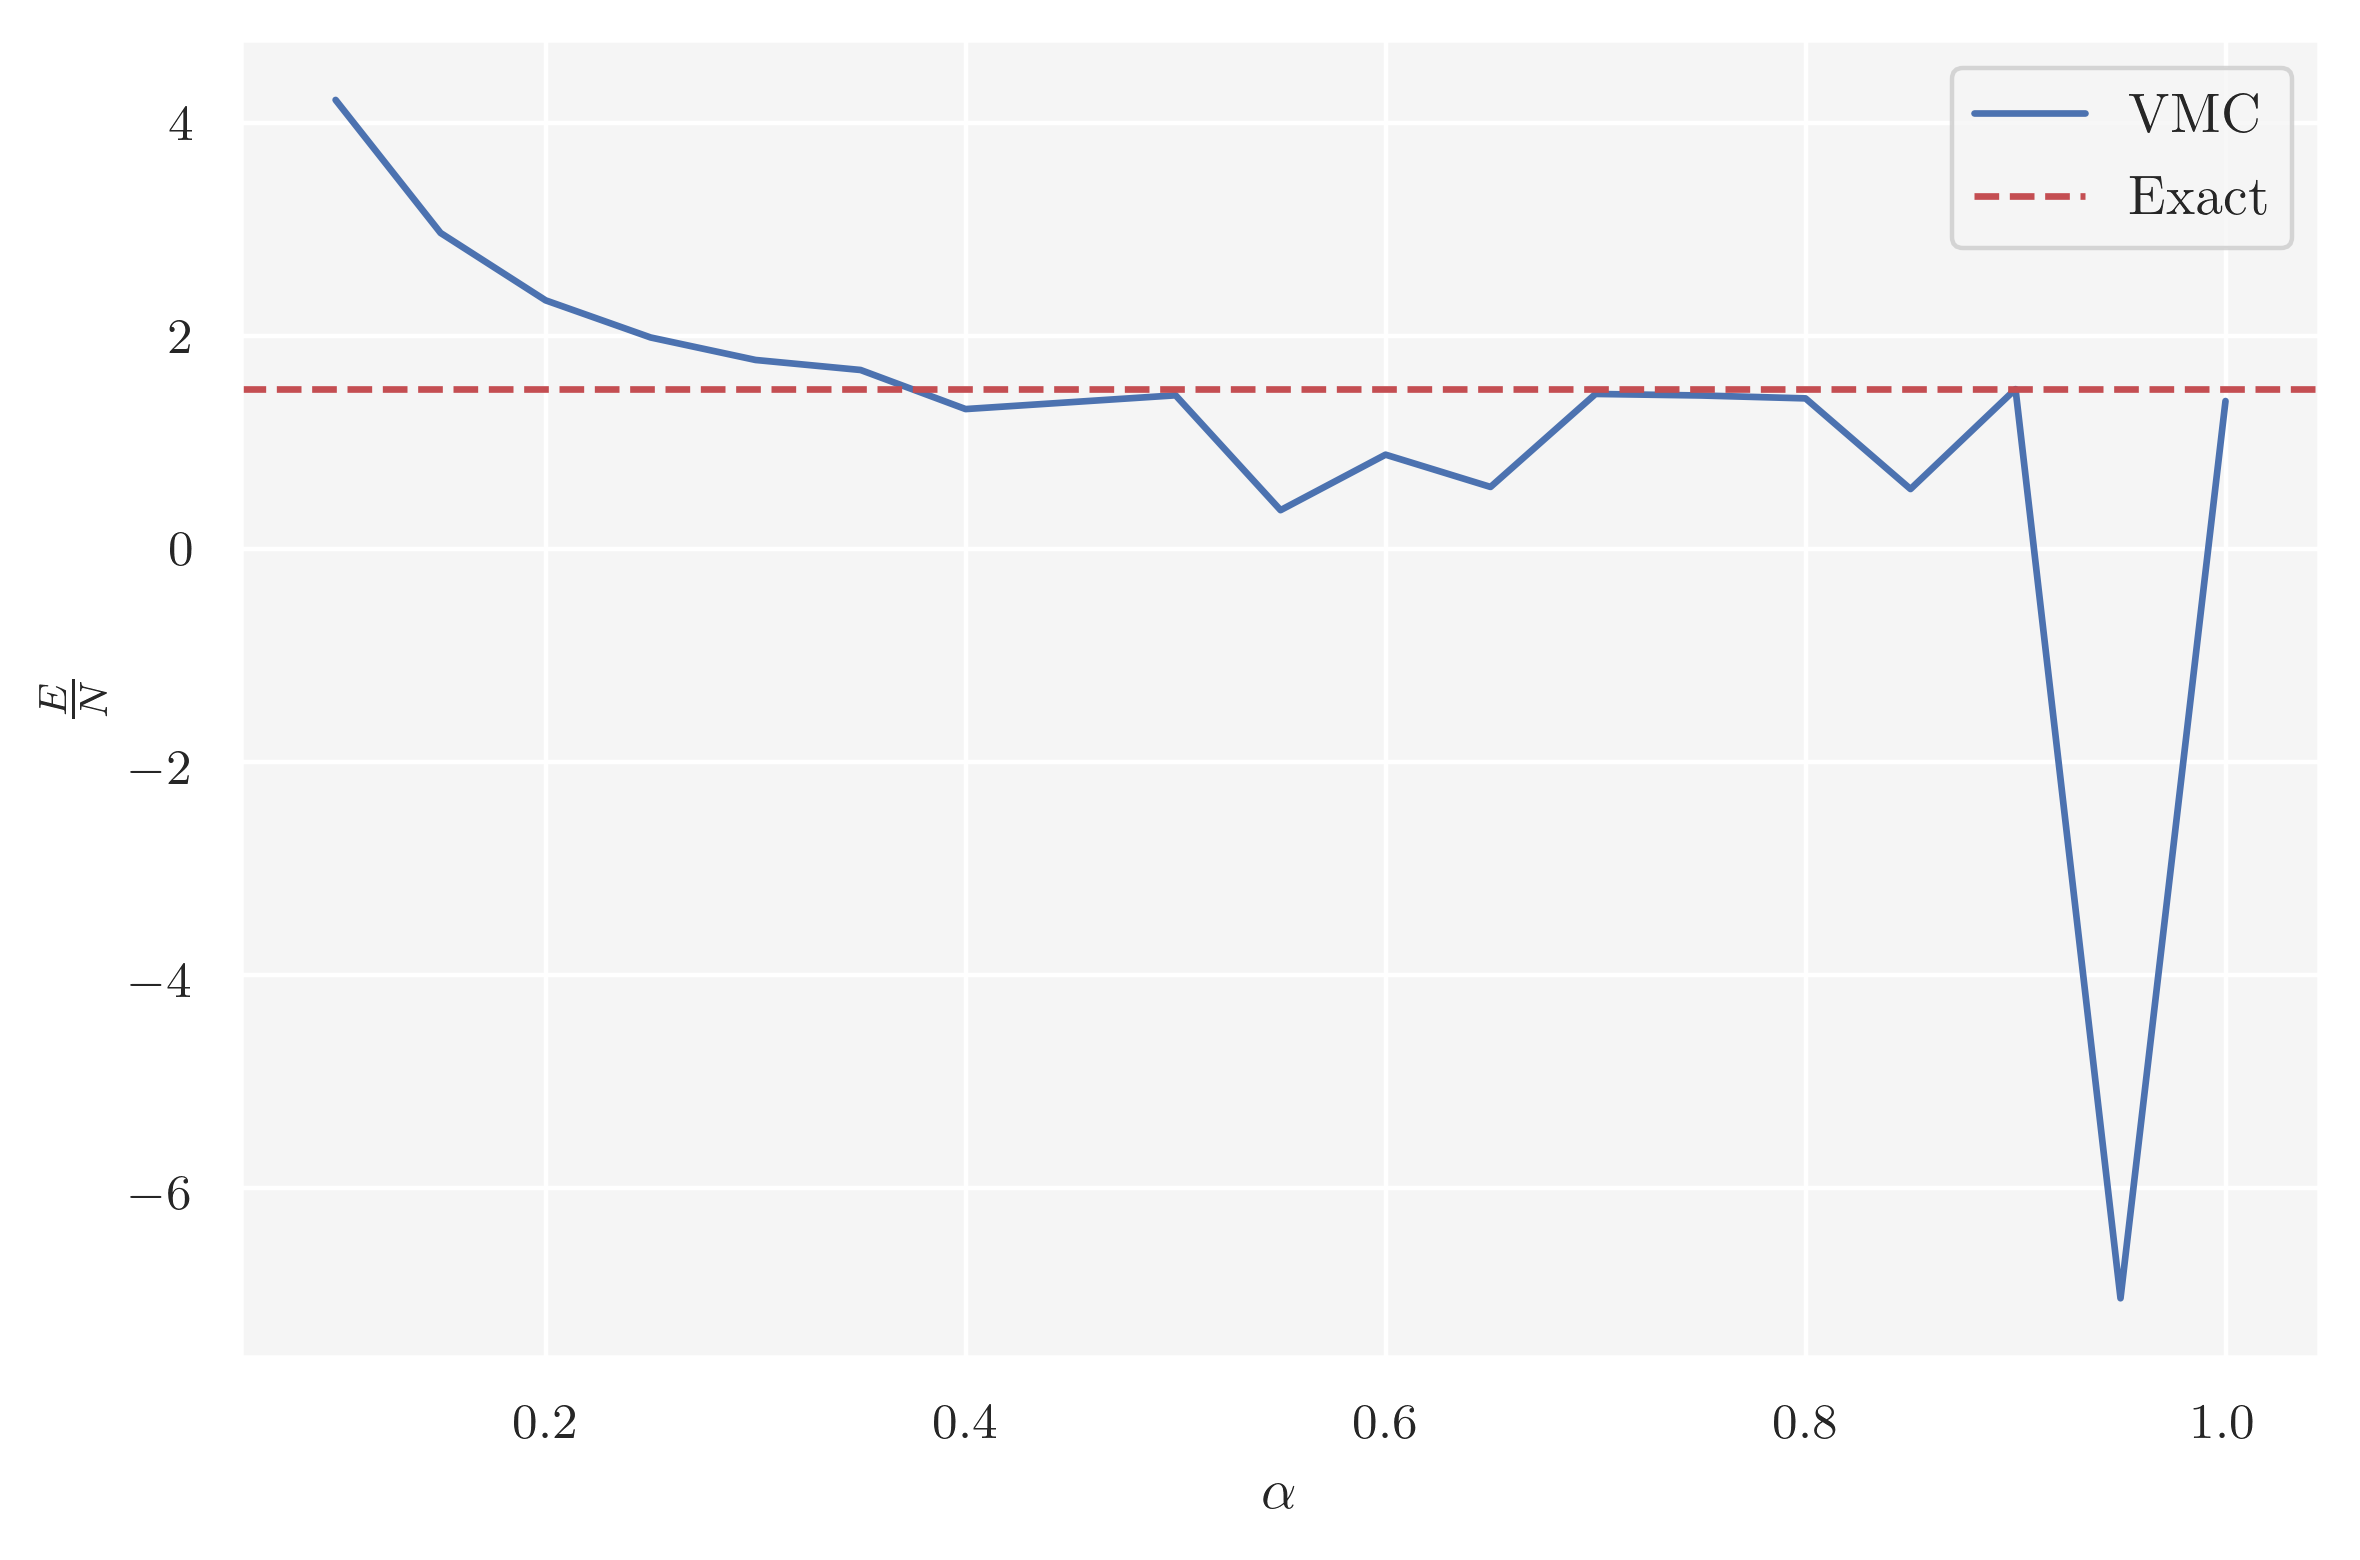

In [6]:
mod_df_10 = df_N10
mod_df_10["energy"] = mod_df_10["energy"]/10.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_10/10.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_10.pdf"), bbox_inches='tight')

In [8]:
N = 50
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_50 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N50 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=5000,
                            tune_interval=250,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N50.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Sampler elapsed time: 3397.0287911891937


In [13]:
df_N50 = pd.concat(results, ignore_index=True)
df_N50

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,50,3,0.1,189.467721,2.445184,0.458289
1,50,3,0.2,113.307914,1.232658,0.485464
2,50,3,0.3,NaN,NaN,0.469715
3,50,3,0.4,NaN,NaN,0.490007
4,50,3,0.5,85.085996,0.095555,0.479457
5,50,3,0.6,89.149446,0.395039,0.446416
6,50,3,0.7,94.945586,0.492640,0.513211
7,50,3,0.8,102.526296,0.964003,0.517305
8,50,3,0.9,NaN,NaN,0.500053
9,50,3,1.0,121.699275,1.272657,0.492689


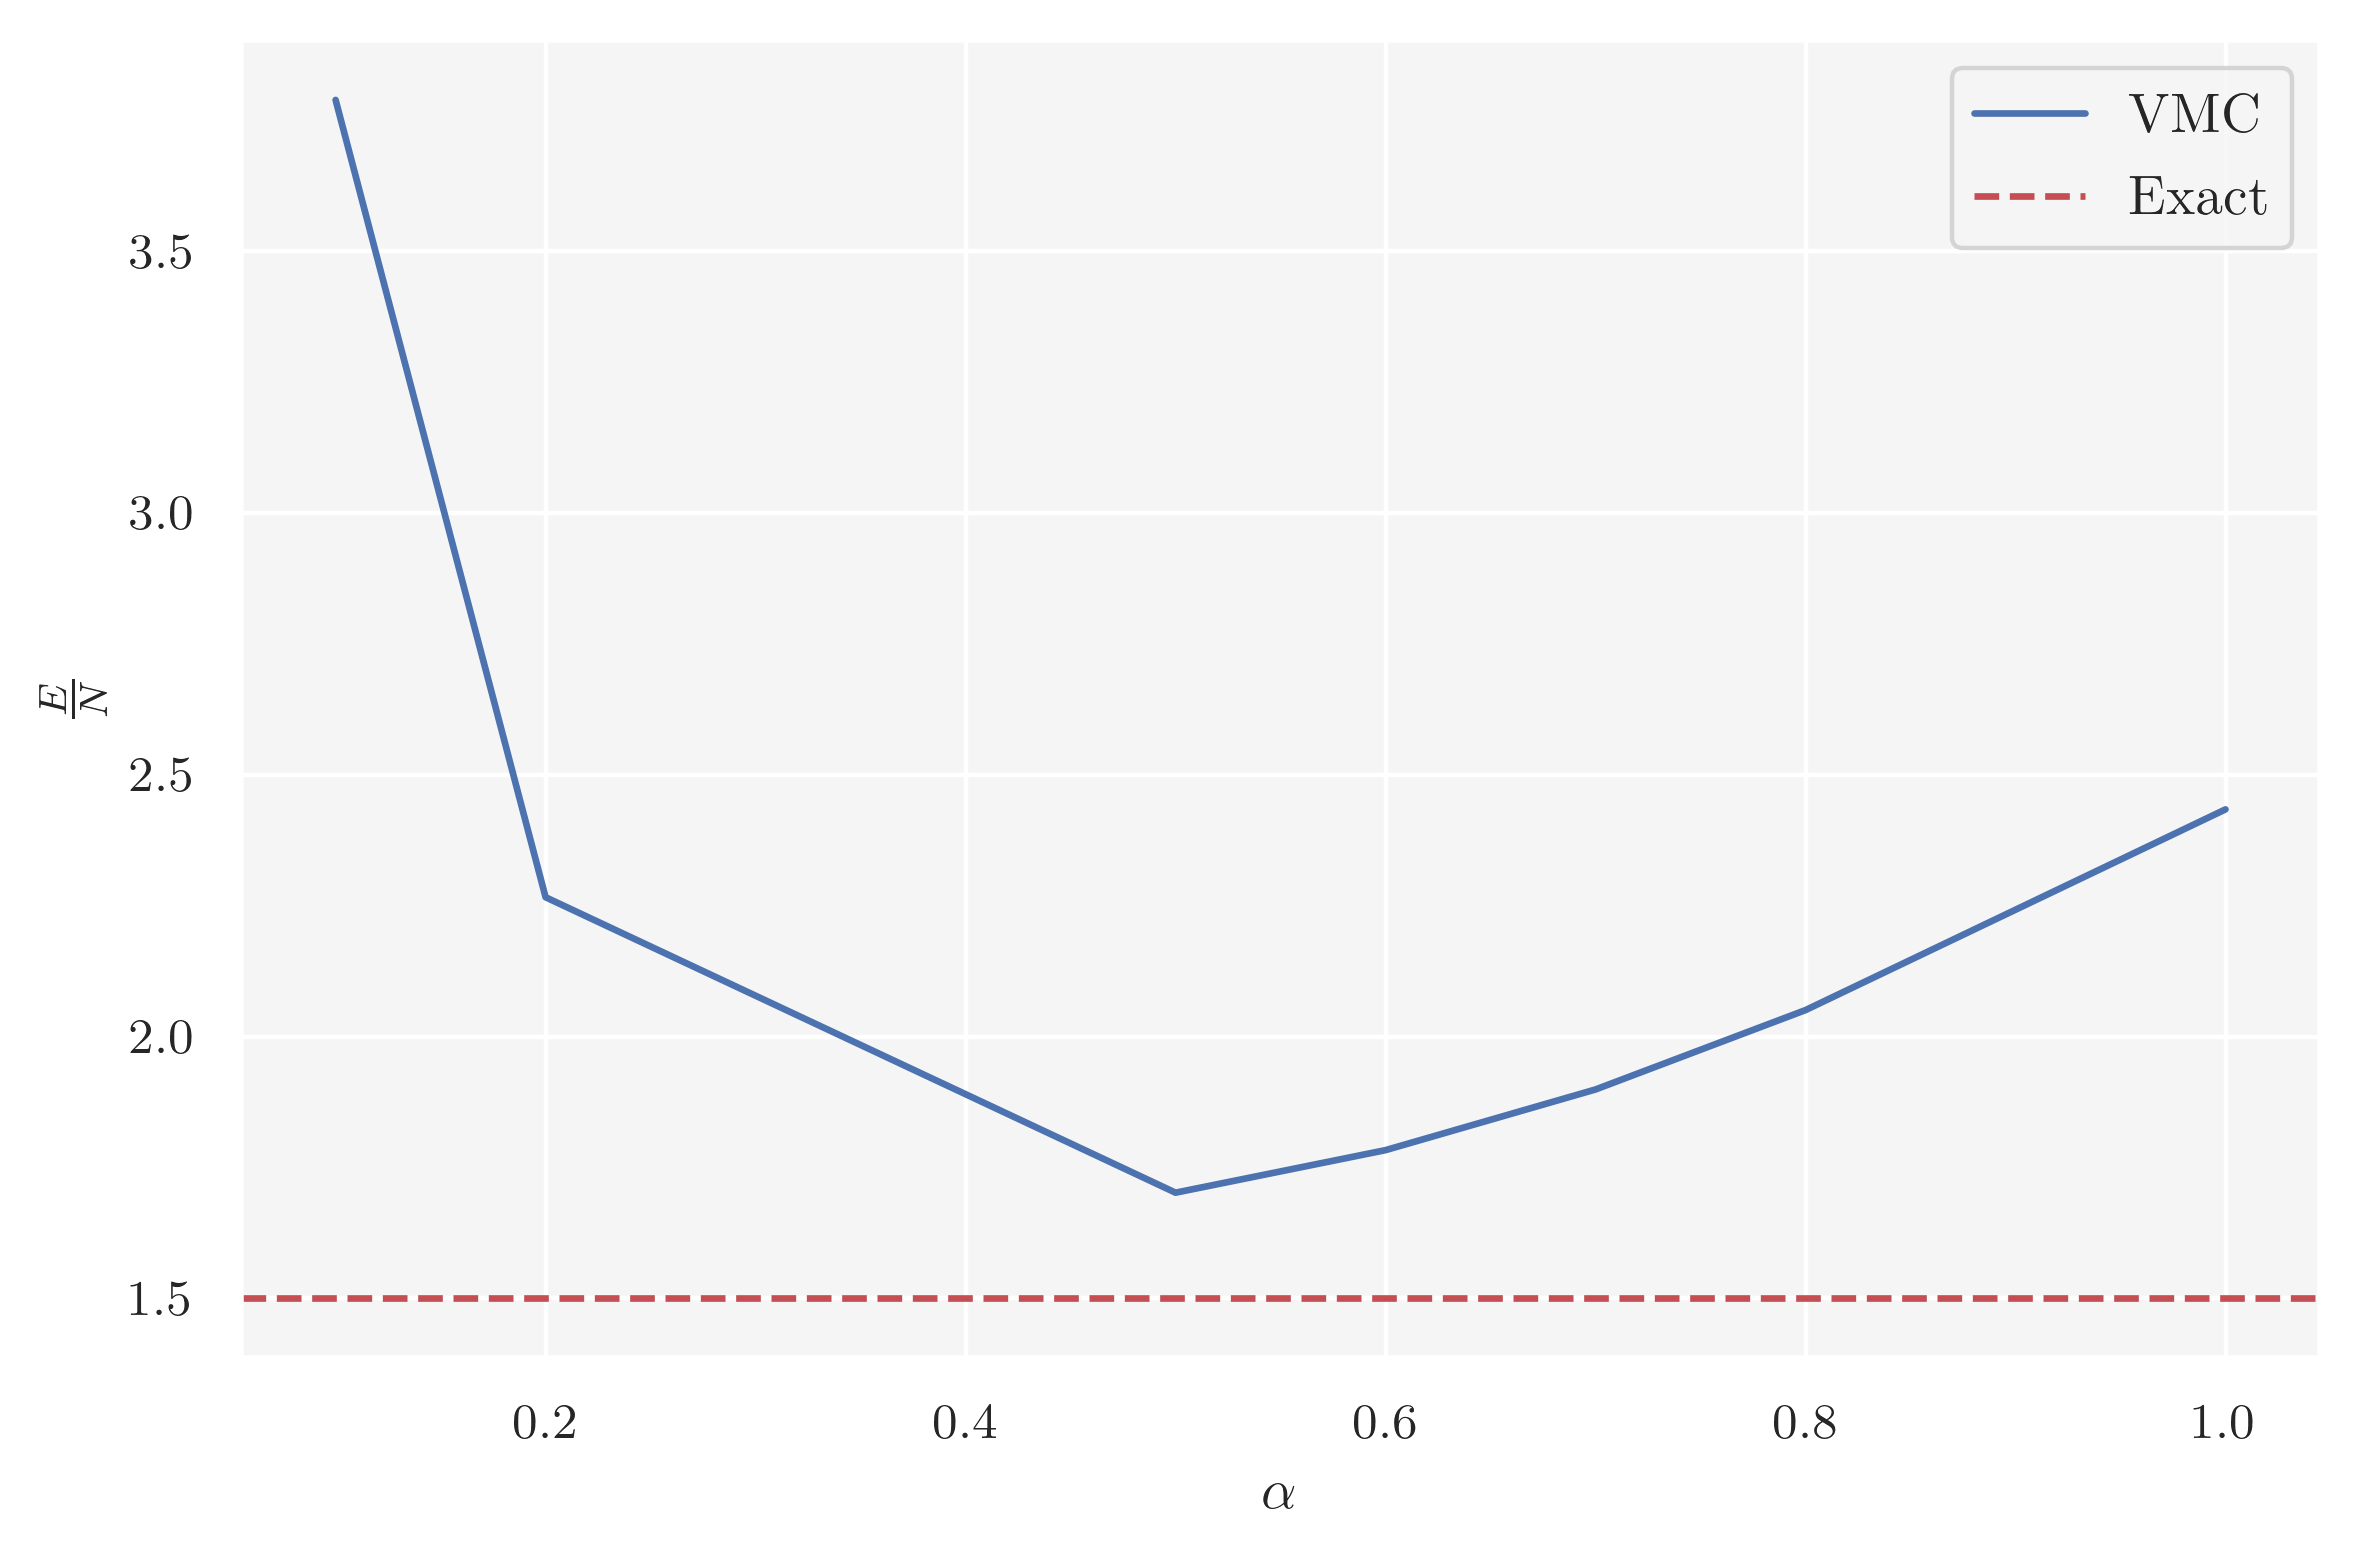

In [14]:
mod_df_50 = df_N50
mod_df_50["energy"] = mod_df_50["energy"]/50.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_50/50.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_50.pdf"), bbox_inches='tight')

In [15]:
N = 100
dim = 3
omega = 1.

# Exact energy without interactions
NI_exact_energy_100 = exact_energy(N, dim, omega)
# Instantiate wave function
wf = vmc.AIB(N, dim, omega)

# Instantiate sampler
sampler = vmc.samplers.Metropolis(wf)

# Config
nsamples = 10000
alpha_step = 0.1
alphas = np.arange(0.1, 1 + alpha_step, alpha_step)

results_N100 = []

start = time.time()
for i, alpha in enumerate(alphas):
    initial_positions = safe_initial_positions_w_interactions(wf, alpha, N, dim)
    result = sampler.sample(nsamples,
                            initial_positions,
                            alpha,
                            nchains=1,
                            scale=1.0,
                            seed=None,
                            warm=True,
                            warmup_iter=500,
                            tune=True,
                            tune_iter=5000,
                            tune_interval=250,
                            tol_tune=1e-5,
                            optimize=False
                           )
    results_N100.append(result)

end = time.time()
print("Sampler elapsed time:", end - start)

Sampler elapsed time: 58989.056436538696


In [19]:
df_N100 = pd.concat(results_N100, ignore_index=True)
df_N100

,nparticles,dim,alpha,energy,standard_error,accept_rate
0,100,3,0.1,399.348141,6.316668,0.482579
1,100,3,0.2,224.366276,2.211765,0.470726
2,100,3,0.3,188.294054,1.185190,0.409013
3,100,3,0.4,182.483795,0.340161,0.369668
4,100,3,0.5,191.855166,0.286625,0.349134
5,100,3,0.6,NaN,NaN,0.344612
6,100,3,0.7,NaN,NaN,0.338662
7,100,3,0.8,NaN,NaN,0.360069
8,100,3,0.9,NaN,NaN,0.337679
9,100,3,1.0,NaN,NaN,0.365270


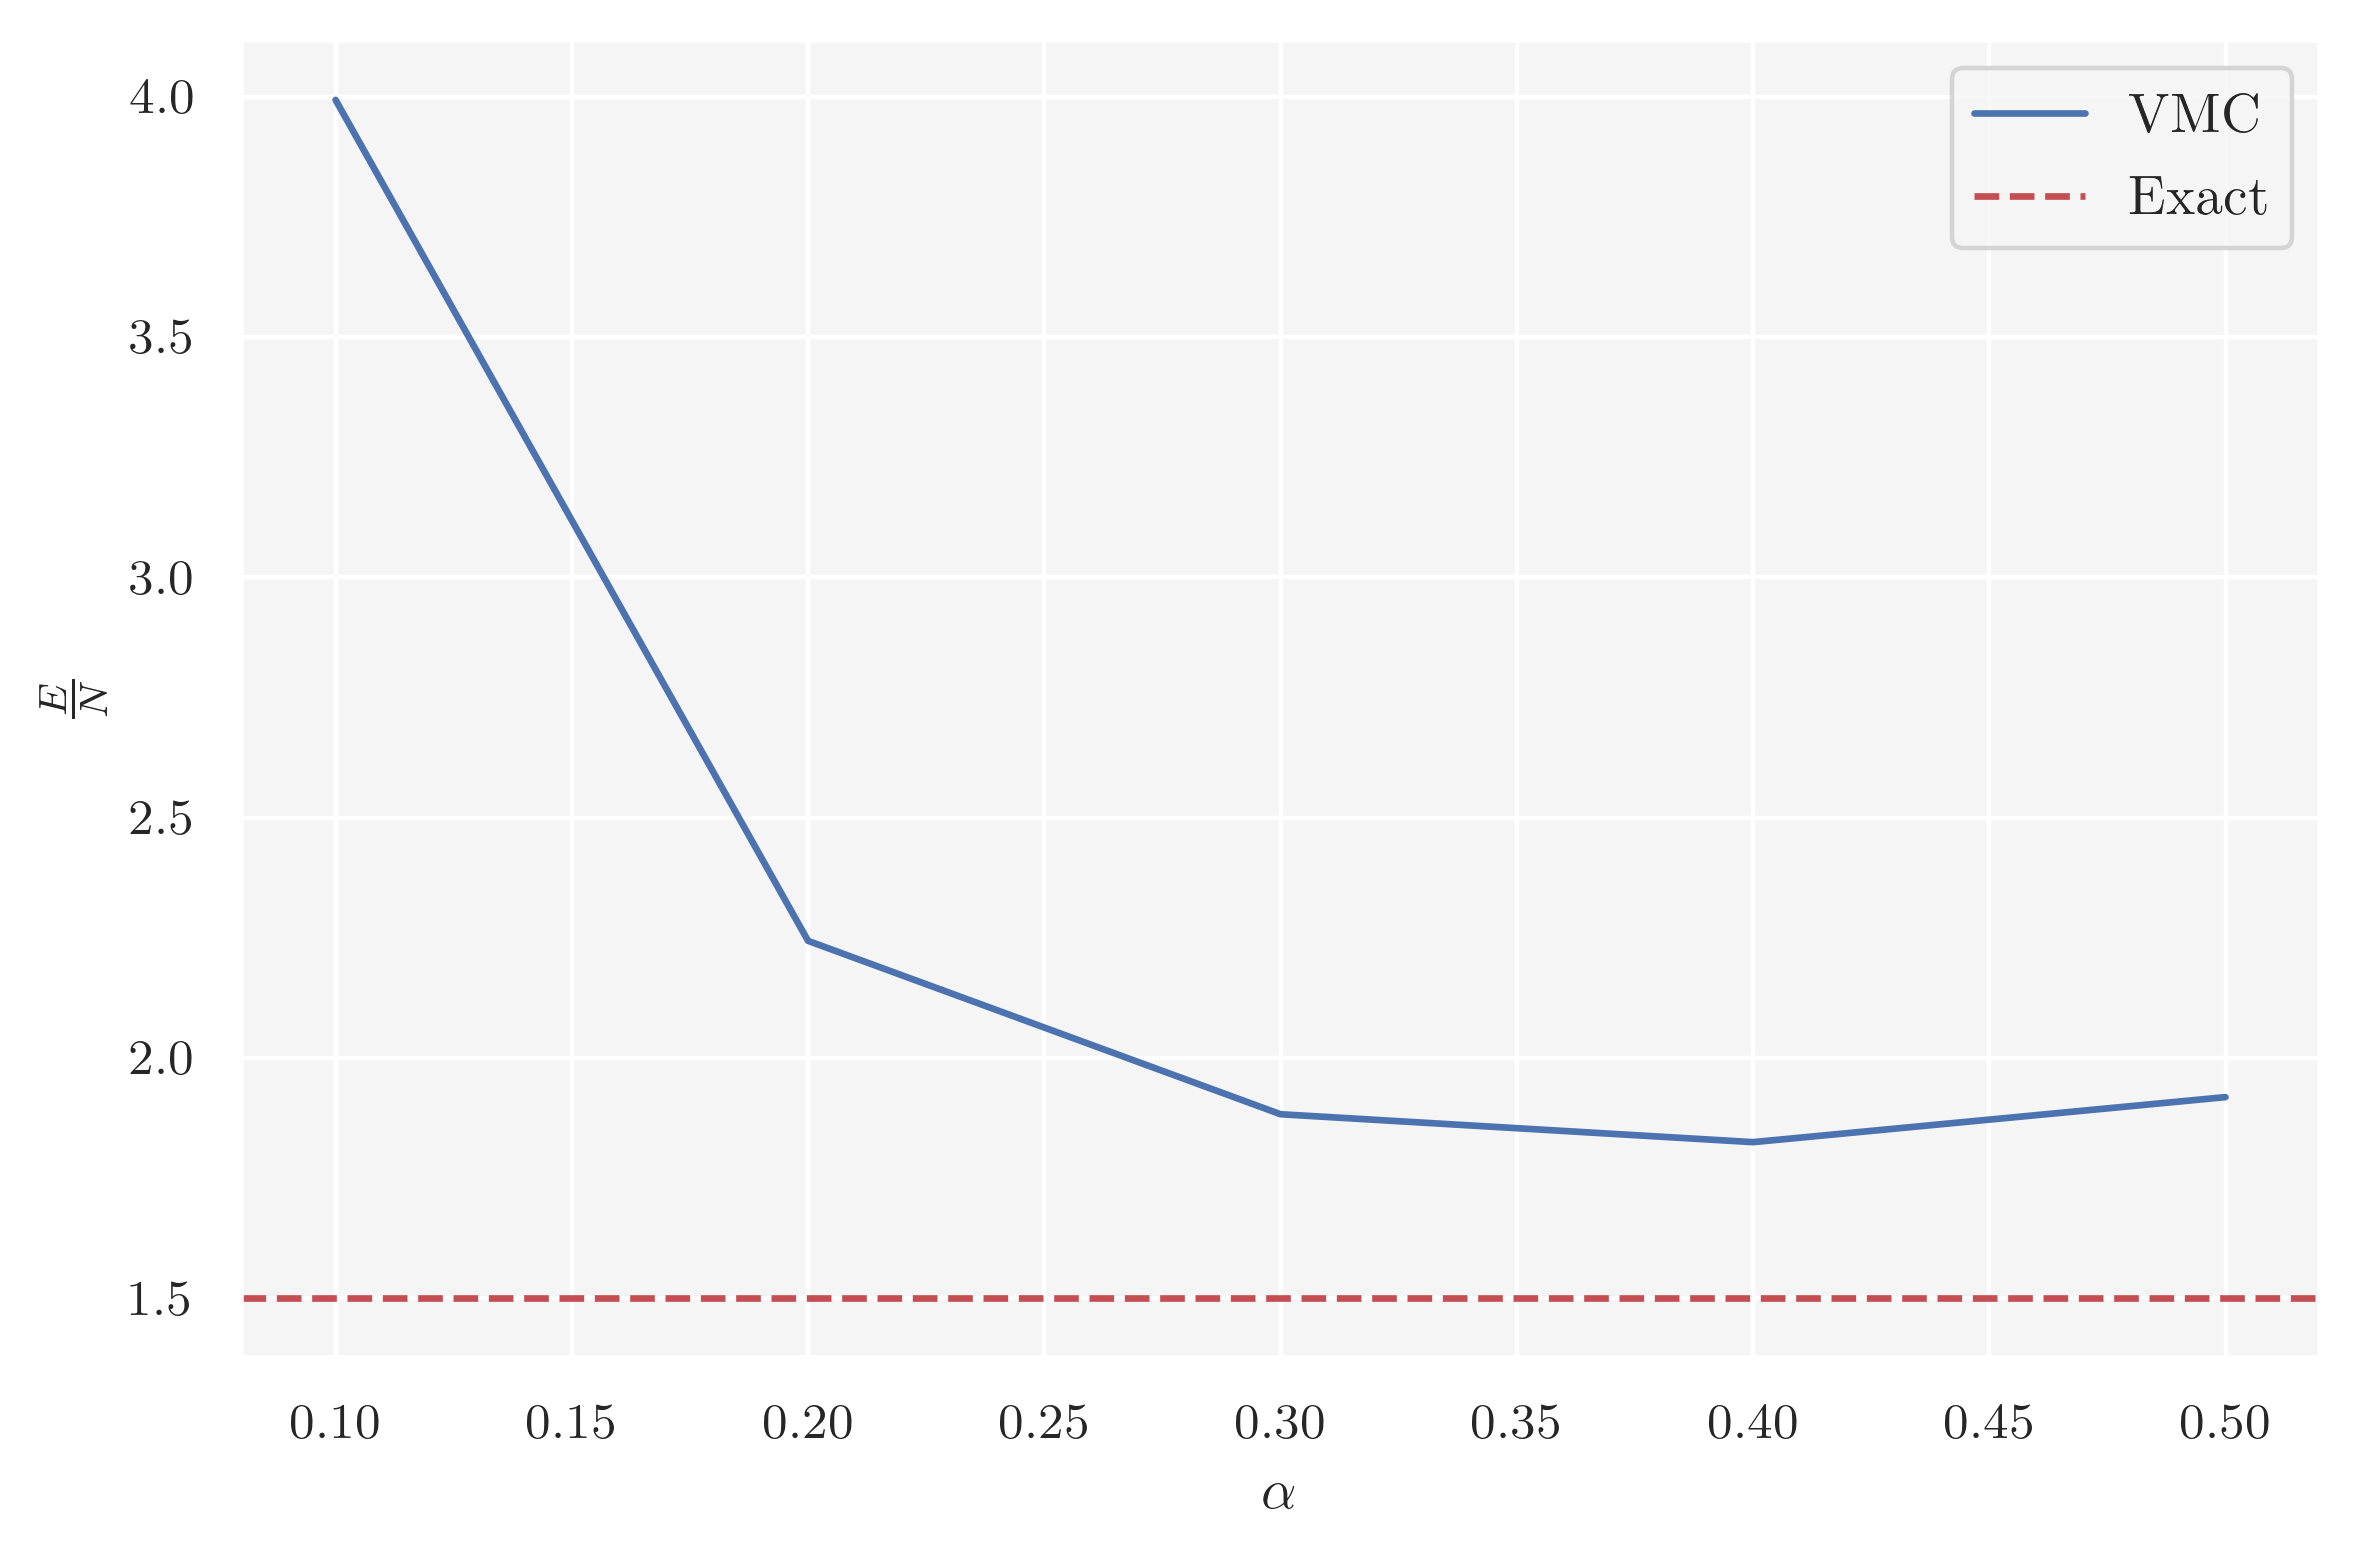

In [20]:
mod_df_100 = df_N100
mod_df_100["energy"] = mod_df_100["energy"]/100.0
fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_100, x="alpha", y="energy", ax=ax, label="VMC")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_N_100.pdf"), bbox_inches='tight')

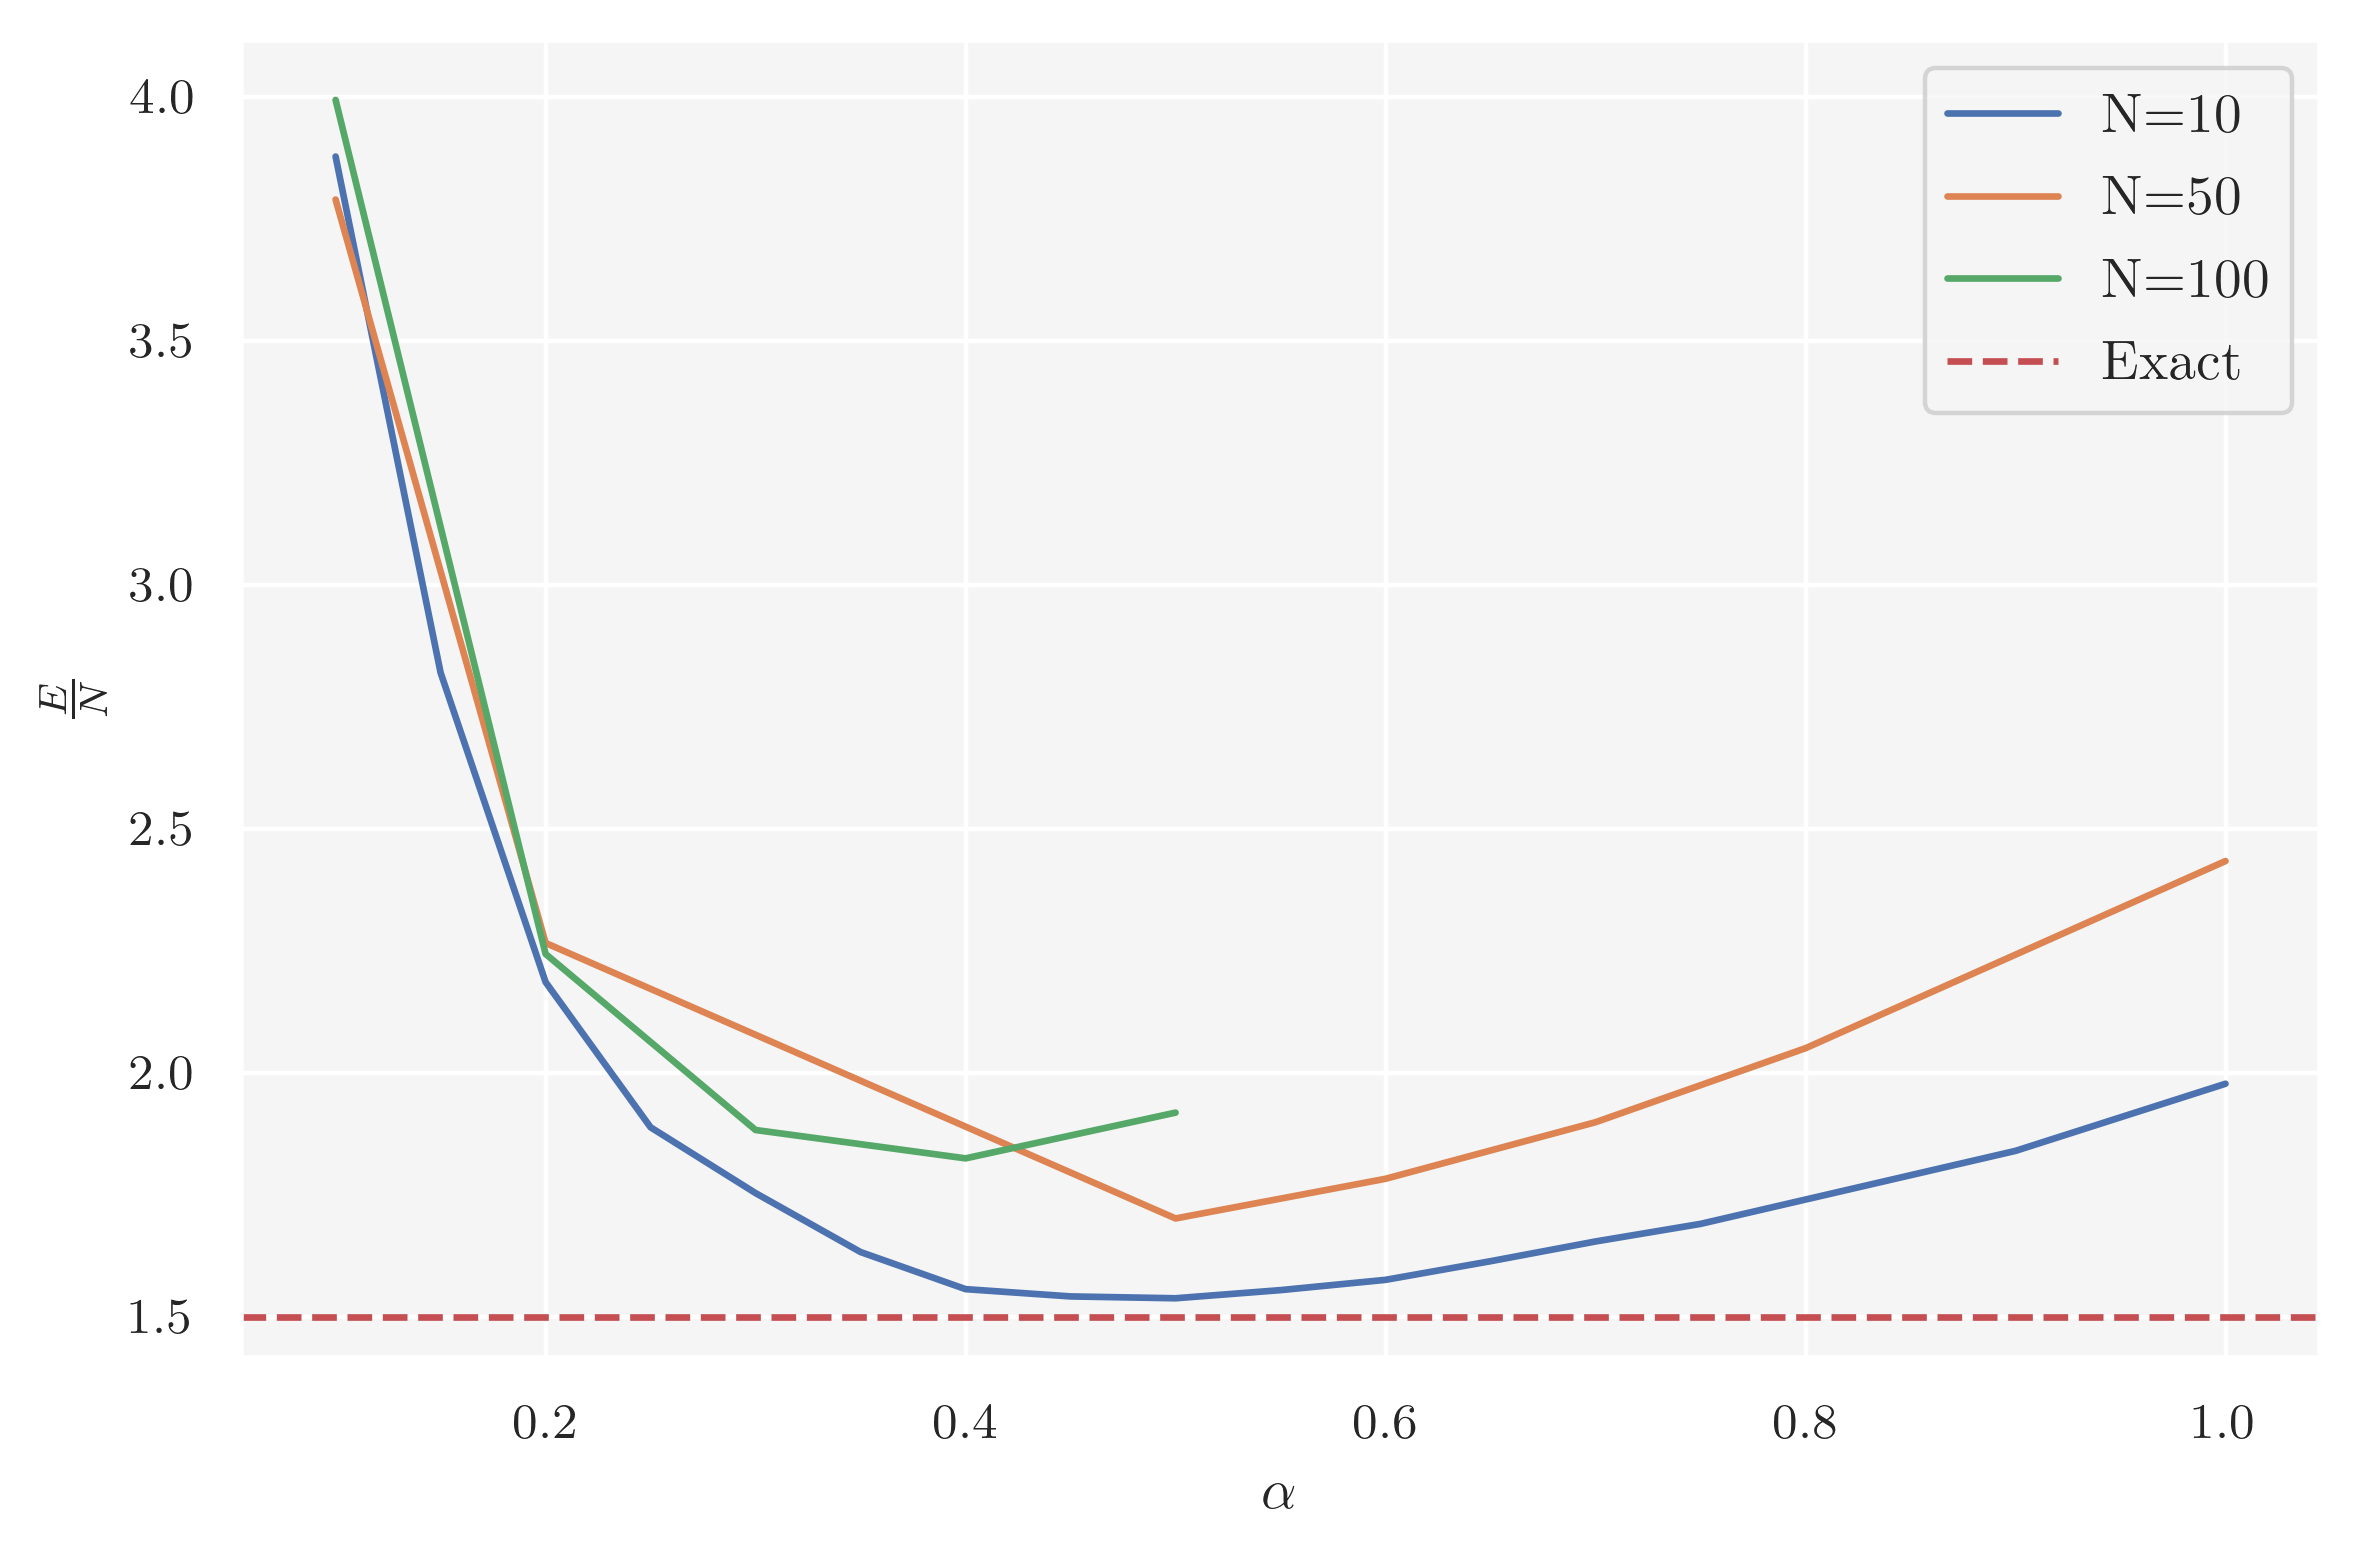

In [21]:
fig, ax = plt.subplots(figsize=(6,4), tight_layout=True, dpi=200)
sns.lineplot(data=mod_df_10, x="alpha", y="energy", ax=ax, label="N=10")
sns.lineplot(data=mod_df_50, x="alpha", y="energy", ax=ax, label="N=50")
sns.lineplot(data=mod_df_100, x="alpha", y="energy", ax=ax, label="N=100")
ax.axhline(NI_exact_energy_100/100.0, ls='--', color='r', label='Exact')
ax.set(xlabel=r'$\alpha$', ylabel=r'$\frac{E}{N}$')
ax.legend()
plt.show()

fig.savefig(fig_path("grid_search_analytical_w_interactions_all_N.pdf"), bbox_inches='tight')